# Project Outline: Final Project EDA
In this notebook we are taking a closer look at the data collected for the project "To Everything There is a Season : Using Weather Data and Demographic Information in the Predictive Modeling of Crimes in Dallas, Texas" by Ashley Steele.

[1. Importing Libraries and Setting Preferences](#1.-Importing-Libraries-and-Setting-Preferences)


[2. Importing Data for Exploratory Data Analysis (EDA)](#2.-Importing-Data-for-Exploratory-Data-Analysis-(EDA))


[3. EDA and Feature Engineering on Final Dataset](#3.-EDA-and-Feature-Engineering-on-Final-Dataset)
- [3.1: Feature Distribution and Exploring!](#3.1:-Feature-Distribution-and-Exploring!)
    - [3.1A: What do our time related data look like?](#3.1A:-What-do-our-time-related-data-look-like?)
    - [3.1B: What do our weather data look like?](#3.1B:-What-do-our-weather-data-look-like?)
    - [3.1C: What do our census demographic data look like?](#3.1C:-What-do-our-census-demographic-data-look-like?)
    - [3.1D: What do our crime data look like?](#3.1D:-What-do-our-crime-data-look-like?)


[4. Relationships Between Features & Visualizations](#4.-Relationships-Between-Features-&-Visualizations)

## 1. Importing Libraries and Setting Preferences
[Back to Outline](#Project-Outline:-Final-Project-EDA)

In [1]:
# Importing all important libraries here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [2]:
# Setting default number of decimal places for this notebook!
pd.set_option('precision', 0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Setting our plotting preferences
sns.set_style('whitegrid')
plt.figure(figsize= (20,20))
sns.set(palette= 'bright', font_scale = 1.5)

<Figure size 1440x1440 with 0 Axes>

## 2. Importing Data for Exploratory Data Analysis (EDA)
[Back to Outline](#Project-Outline:-Final-Project-EDA)

In [4]:
# Importing our data to play with
complete = pd.read_csv('complete.csv')

In [5]:
# What does our data look like?
complete.head()

,Unnamed: 0,date_only,month,mnth_yr,day1_of_the_week,time_of_occurrence,day_of_the_year,temp_in_F,humidity,percip_inches,911_call_type,type_of_incident,division,sector,council_district,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,x_coordinate,y_cordinate,zip_code,total_pop,male,%_male,female,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty,year,zip_code.1
0,0,2015-01-01,1,January-2015,Thu,17:00,1,34,89,3e-02,11V - BURG MOTOR VEH,BMV,SOUTH CENTRAL,73,D8,Individual,White,Non-Hispanic or Latino,Male,50,8173,"JONES,REGINALD,LADUNNE",NaN,NaN,3e+06,7e+06,75241,50872,23984,46,26888,54,34,72,68,14,12,21,75,12,0e+00,20,3777,3777,49,6,42030,28,31,2015,75241
1,1,2015-01-01,1,January-2015,Thu,00:20,1,34,89,3e-02,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,SOUTH CENTRAL,71,D4,Individual,Black,Non-Hispanic or Latino,Male,51,8133,"ADAMS,CORY,JAMES",NaN,NaN,2e+06,7e+06,75216,76015,35922,47,40093,53,35,72,68,16,13,30,65,3,1e-01,33,3142,3142,46,7,35651,34,39,2015,75216
2,2,2015-01-01,1,January-2015,Thu,08:00,1,34,89,3e-02,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,CENTRAL,15,D2,Individual,Black,Non-Hispanic or Latino,Female,64,7341,"FREEMAN,DIANA,J",NaN,NaN,2e+06,7e+06,75215,22570,11298,49,11272,51,39,79,76,16,13,23,74,3,7e-01,17,2086,2086,45,6,36630,30,37,2015,75215
3,3,2015-01-01,1,January-2015,Thu,02:00,1,34,89,3e-02,40 - OTHER,ASSAULT -VERBAL THREAT,NORTHWEST,52,D6,Individual,Hispanic or Latino,Hispanic or Latino,Male,36,10767,"HOVIS,ALAN",5455,"AKON,FREDRICK,CHARLES",2e+06,7e+06,75220,69009,38379,53,30630,47,34,75,71,12,9,76,7,16,3e+00,48,4478,4478,63,5,104542,18,20,2015,75220
4,4,2015-01-01,1,January-2015,Thu,13:00,1,34,89,3e-02,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,NORTHEAST,22,D9,Individual,Black,Non-Hispanic or Latino,Female,70,9654,"BANDAS,WAYI,ALIBEY",NaN,NaN,3e+06,7e+06,75228,106467,52189,49,54278,51,32,70,66,12,9,49,24,13,2e+00,49,3866,3866,61,7,51758,23,24,2015,75228


In [6]:
# Getting rid of our Unnamed column
complete.drop(columns = 'Unnamed: 0', inplace = True)

Excellent! Our data looks like it is in a pretty good place so far so let's dig in and explore!

## 3. EDA and Feature Engineering on Final Dataset
[Back to Outline](#Project-Outline:-Final-Project-EDA)

### 3.1: Feature Distribution and Exploring!
[Back to Outline](#Project-Outline:-Final-Project-EDA)

Now that our data is in a format that is easier to work with let's take a deeper look at our individual features and what they look like!

#### 3.1A: What do our time related data look like?
[Back to Outline](#Project-Outline:-Final-Project-EDA)

Each of the three datasets we combined to make our mega-dataset is based on time-related features, such as date, year, time of occurrence, etc. Let's take a closer look at the distribution of these features individually.

**In this dataset we have the following time-related features to consider:**

- Date
- Month
- Month and Year
- Day of the Week
- Time of occurrence
- Day of the Year

In [7]:
# Looking at our distribution of dates in this dataset

# Counting the number of occurrences per calendar date in our data
date_count = pd.DataFrame(complete['date_only'].value_counts())
date_count.head(20)

,date_only
2016-01-01,293
2017-01-01,266
2018-09-01,262
2018-12-01,261
2018-08-01,259
2018-07-01,259
2018-10-01,256
2018-08-04,240
2018-08-24,238
2018-10-06,237


In [8]:
# Resetting index so we can order chronologically
date_count.reset_index(inplace = True)

In [9]:
# Quick column name change
date_count.rename(columns = {'index':'date', 'date_only': 'count'}, inplace = True)

In [10]:
# What does this data look like now?
date_count.head()

,date,count
0,2016-01-01,293
1,2017-01-01,266
2,2018-09-01,262
3,2018-12-01,261
4,2018-08-01,259


In [11]:
# Making our date a datetime object
date_count['date']= pd.to_datetime(date_count['date'])

In [12]:
# Reordering our datecounts to be in chronological order
date_count = date_count.sort_values(by= 'date', ascending = True)

In [13]:
# Checking to make sure we don't have duplicate dates
date_count.nunique()

date     1461
count     138
dtype: int64

In [14]:
# How long is our dataset?
len(date_count)

1461

Looking at the counts above (and sheer amount of dates involved within the scope of our project) it makes sense to break this info down further before we attempt to visualize the data!

Since there are 1,096 individual dates in our dataset let's start at a much larger division of time- year.

**Q: How many crimes do we have per year in our dataset?**

In [15]:
# Converting date_only to a datetime object
complete['date_only'] = pd.to_datetime(complete['date_only'])

In [16]:
# When we were cleaning our dataset earlier the year column became merky and had to be dropped. Let's create a clean year now!
complete['year'] = complete['date_only'].dt.year

In [17]:
# What does the distribution of crimes per year look like, numberwise?

# Creating a sub-dataframe for year counts
year_count = pd.DataFrame(complete['year'].value_counts())

# Resetting our index
year_count.reset_index(inplace = True)

In [18]:
# Let's look at this info
year_count

,index,year
0,2016,65817
1,2018,64904
2,2015,62430
3,2017,61573


In [19]:
# Renaming our columns
year_count.rename(columns = {'index': 'year', 'year': 'count'}, inplace = True)

In [20]:
# Looking at this data again
year_count

,year,count
0,2016,65817
1,2018,64904
2,2015,62430
3,2017,61573


In [21]:
# Sorting in chronological order
year_count.sort_values(by = 'year', ascending = True, inplace = True)

In [22]:
# What does this actually look like?
year_count

,year,count
2,2015,62430
0,2016,65817
3,2017,61573
1,2018,64904


''

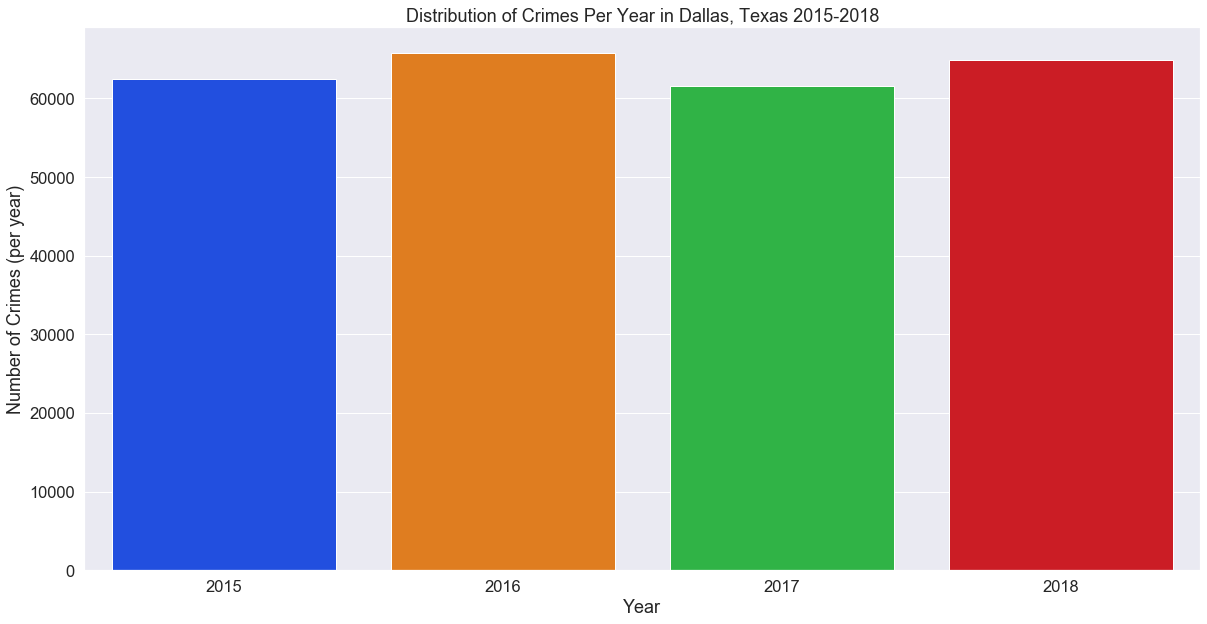

In [23]:
# What does this look like, visually?
plt.figure(figsize= (20,10))
sns.barplot(x= 'year', y= 'count' ,data = year_count, palette = "bright")
plt.title('Distribution of Crimes Per Year in Dallas, Texas 2015-2018')
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
;

**Takeaway:**
- 2016 was the year with the most crime occurrences, followed by 2018
- 2017 was the year with the least amount of crimes

Our original data for 2019 is, of course, incomplete, so it would be interesting to look at a count of crimes in the same time range for each complete year. In our original dataset for crime calls we collected information from 1/1/19 to 8/31/19. 

Let's see how the number of occurrences in this time period (1/1 to 8/31) compare to other years.

In [24]:
# Creating a sub-dataframe of crimes within the months of January - August for each year
edited_timeframe = complete.loc[complete['month'] <= 8]

In [25]:
# Looking at the distribution of crimes per year based on our new, edited month range!
edited_year_count = pd.DataFrame(edited_timeframe['year'].value_counts())

In [26]:
# What does this look like?
edited_year_count

,year
2016,43836
2017,41502
2018,41208
2015,40572


In [27]:
# Resetting Index
edited_year_count.reset_index(inplace = True)


# Renaming columns
edited_year_count.rename(columns = {'index': 'year', 'year': 'count'}, inplace = True)

# Sorting by year
edited_year_count.sort_values(by = 'year', ascending = True, inplace = True)

# What do our counts look like, numberwise?
edited_year_count

,year,count
3,2015,40572
0,2016,43836
1,2017,41502
2,2018,41208


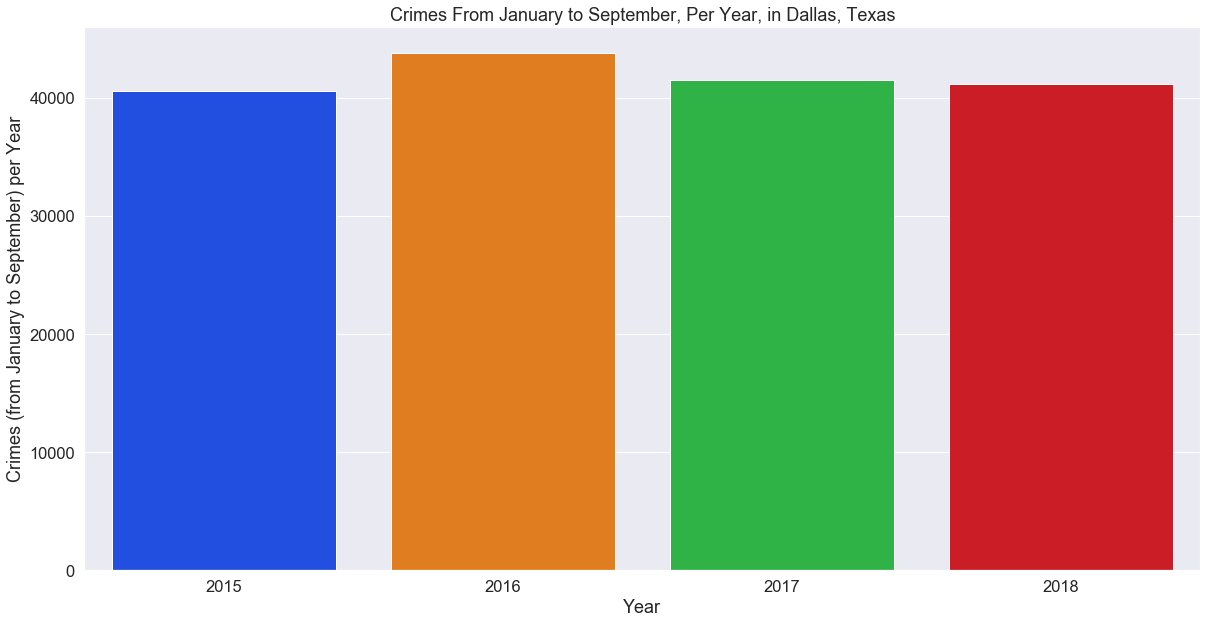

In [28]:
# What does this look like, visually?
plt.figure(figsize= (20,10))
sns.barplot(x= 'year', y= 'count', data= edited_year_count, palette = 'bright')
plt.title('Crimes From January to September, Per Year, in Dallas, Texas')
plt.xlabel('Year')
plt.ylabel('Crimes (from January to September) per Year');

**Takeaways:**
- For the selected time range the highest number of crimes reported occured in 2016
- 2018 and 2015 were almost tied for the number of crimes occuring from January to September

Now that we know how many crimes occurred, both per year and within our selected month range, let's take a closer look at our month and year feature distribution!

**Q: What does crime breakdown by month and year look like, numberwise?

In [29]:
# Creating a sub-dataframe for month and year counts!
month_year_count = pd.DataFrame(complete['mnth_yr'].value_counts())

In [30]:
# Doing dataframe cleaning here- resetting index, renaming columns, and sorting!
month_year_count.reset_index(inplace = True)
month_year_count.rename(columns = {'index':'month_year', 'mnth_yr':'count'}, inplace = True)
month_year_count.sort_values(by = 'month_year', inplace = True)

In [31]:
# What does our final count look like?
month_year_count.head(20)

,month_year,count
36,April-2015,4981
13,April-2016,5574
34,April-2017,5132
37,April-2018,4941
20,August-2015,5469
12,August-2016,5607
15,August-2017,5522
1,August-2018,6192
5,December-2015,5765
17,December-2016,5505


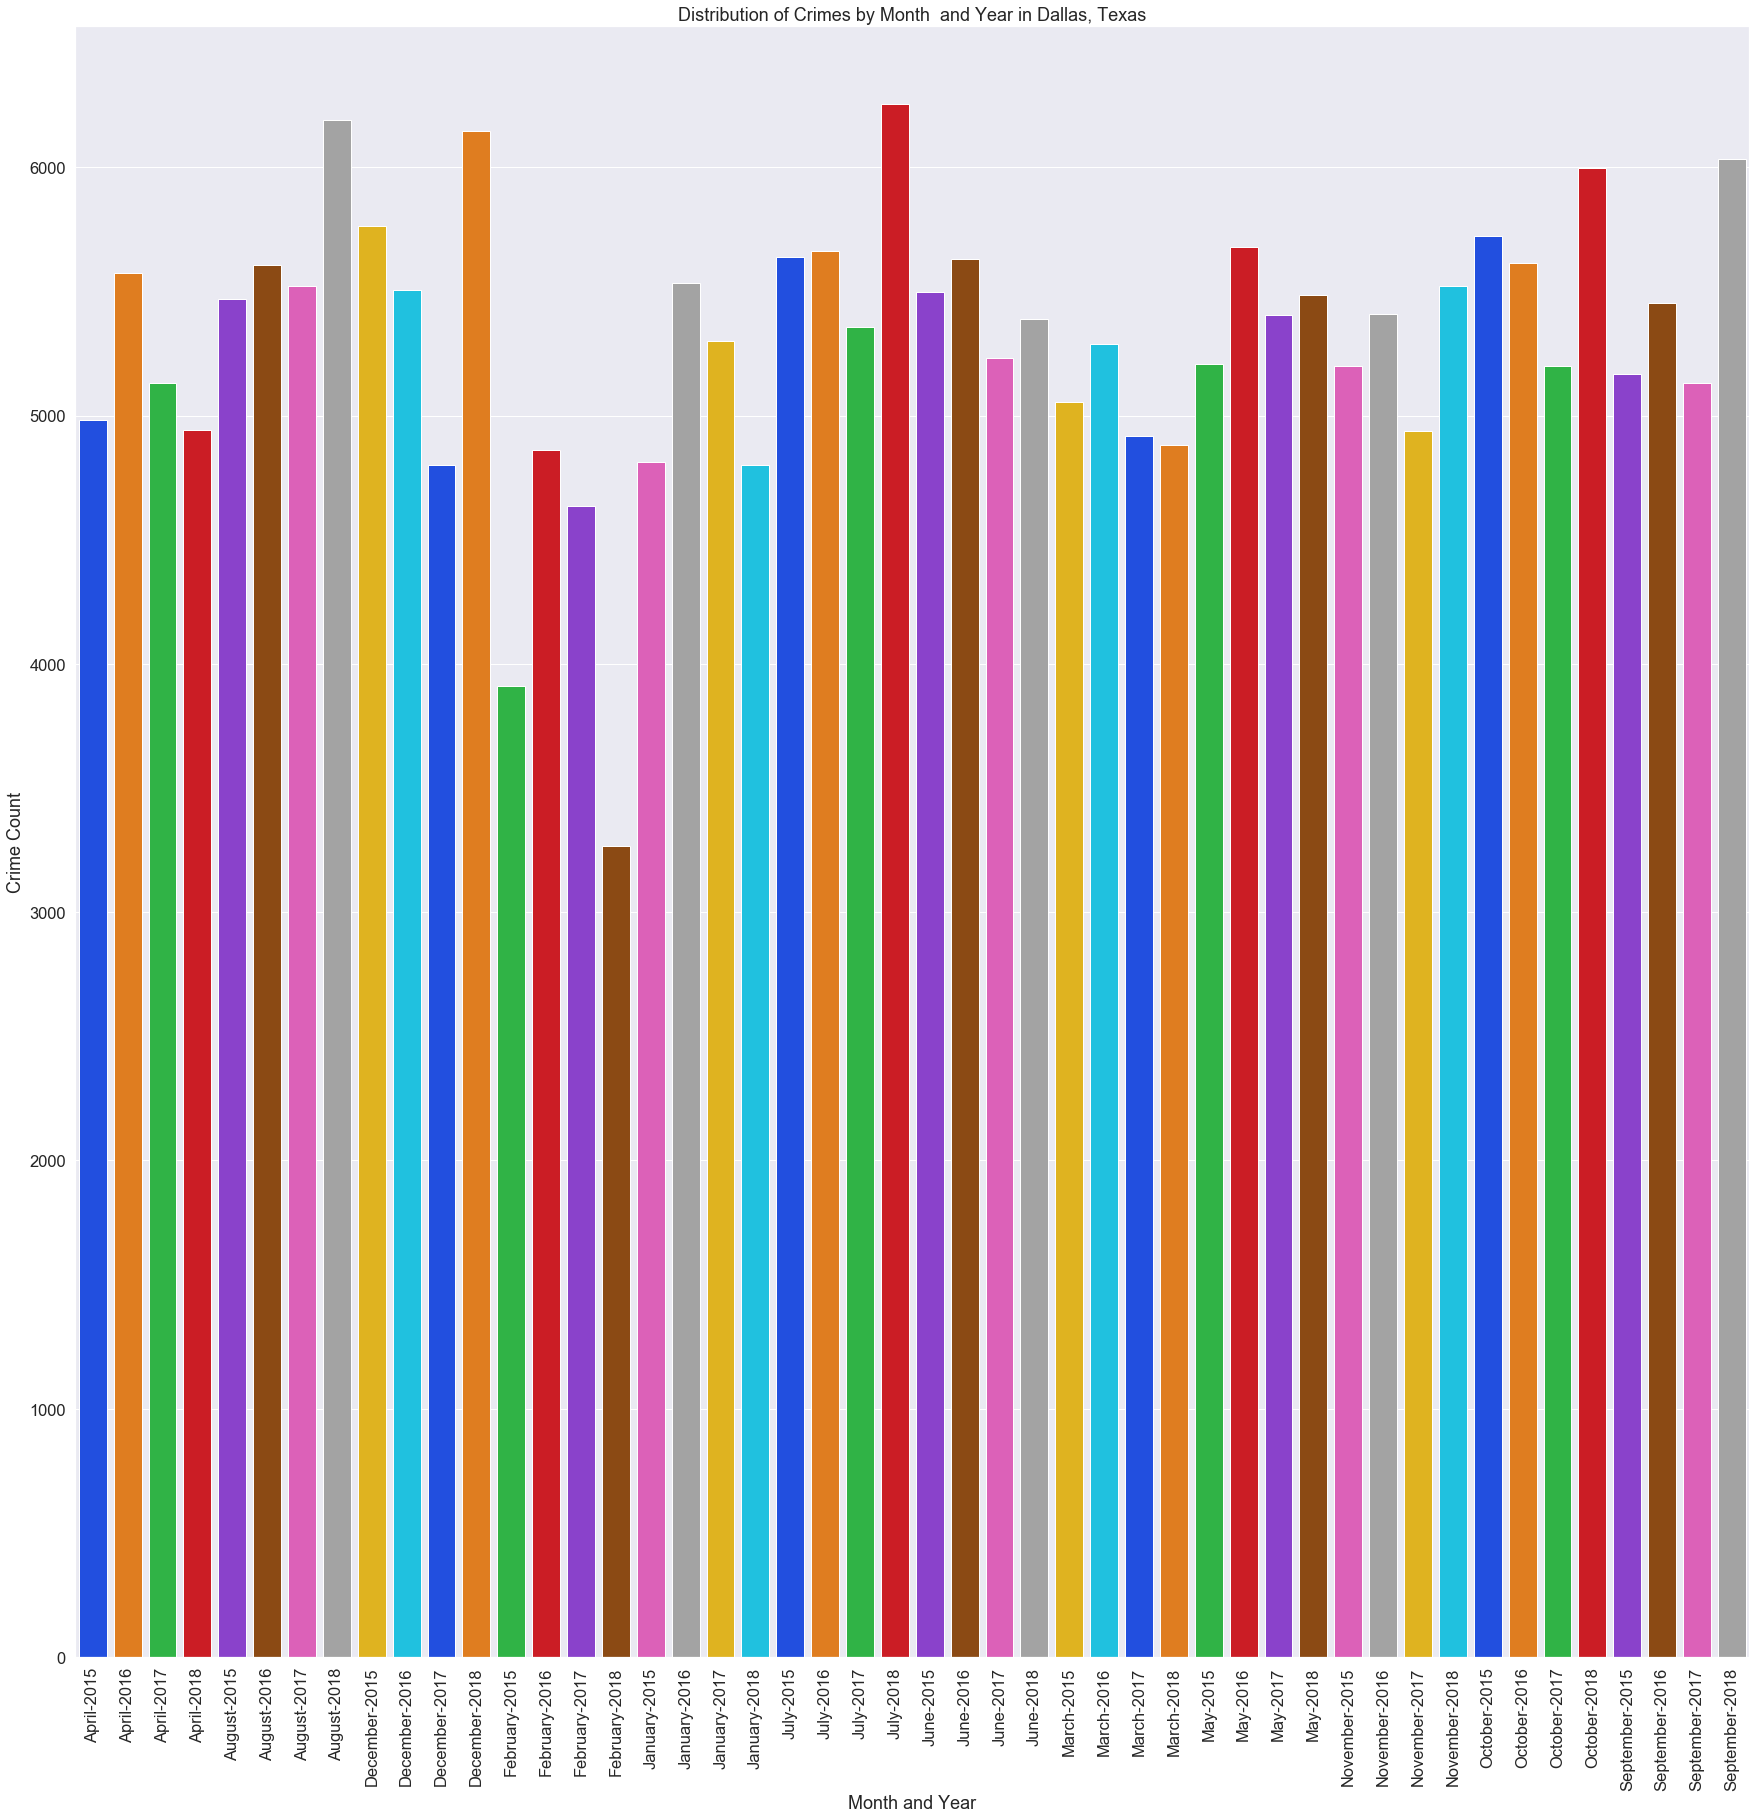

In [32]:
# What does this look like, visually?
plt.figure(figsize = (30,30))
sns.barplot(x= 'month_year', y= 'count', data = month_year_count, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Month  and Year in Dallas, Texas')
plt.xlabel('Month and Year')
plt.ylabel('Crime Count');

Wow, this is a lot of information in a small space. Let's break these up into smaller categories to look at!

Let's look at our months and years by seasons!

In [33]:
# Let's look at these months and years by seasons!

summer = [ 'June-2015', 'June-2016', 'June-2017', 'June-2018', 'July-2015', 'July-2016', 'July-2017', 'July-2018', 
          'August-2015', 'August-2016', 'August-2017', 'August-2018']
fall = [ 'September-2015', 'September-2016', 'September-2017', 'September-2018','October-2015', 'October-2016', 'October-2017', 'October-2018',
 'November-2015', 'November-2016', 'November-2017', 'November-2018']

winter =[ 'December-2015', 'December-2016', 'December-2017', 'December-2018','January-2015', 'January-2016', 'January-2017', 'January-2018', 
  'February-2015', 'February-2016', 'February-2017', 'February-2018']

spring = [ 'March-2015', 'March-2016', 'March-2017', 'March-2018',  'April-2015', 'April-2016', 'April-2017', 'April-2018', 
 'May-2015', 'May-2016', 'May-2017', 'May-2018']


In [34]:
# Creating sub-dataframes by our seasons!
summer_season = month_year_count[month_year_count.month_year.isin(summer)]
fall_season = month_year_count[month_year_count.month_year.isin(fall)]
winter_season = month_year_count[month_year_count.month_year.isin(winter)]
spring_season = month_year_count[month_year_count.month_year.isin(spring)]

AWESOME! Now that we have these new dataframes let's take a look at these, visually!

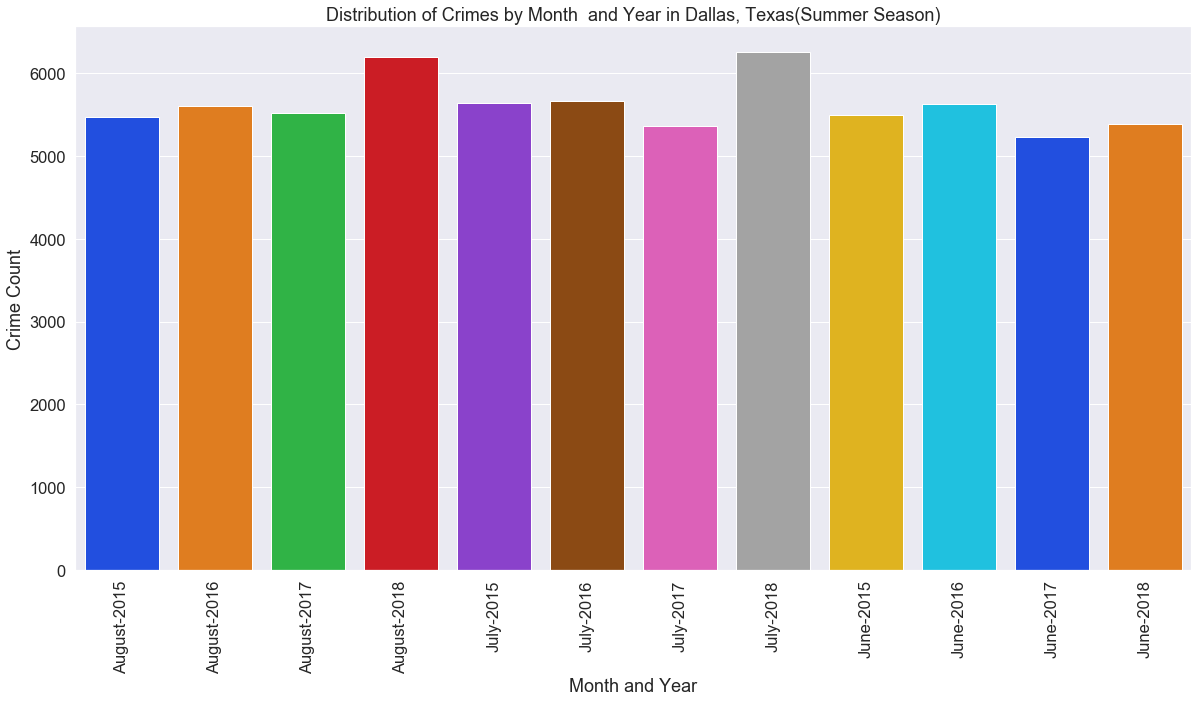

In [35]:
# Looking at Summer visually!
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.barplot(x= 'month_year', y= 'count', data = summer_season, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Month  and Year in Dallas, Texas(Summer Season)')
plt.xlabel('Month and Year')
plt.ylabel('Crime Count');

**Takeaways:**
- Summer in 2018 saw some of the most crimes (specifically in August and July)
- July and June of 2017 had a relatively small occurrence of crime calls in comparison to other months and years in this season

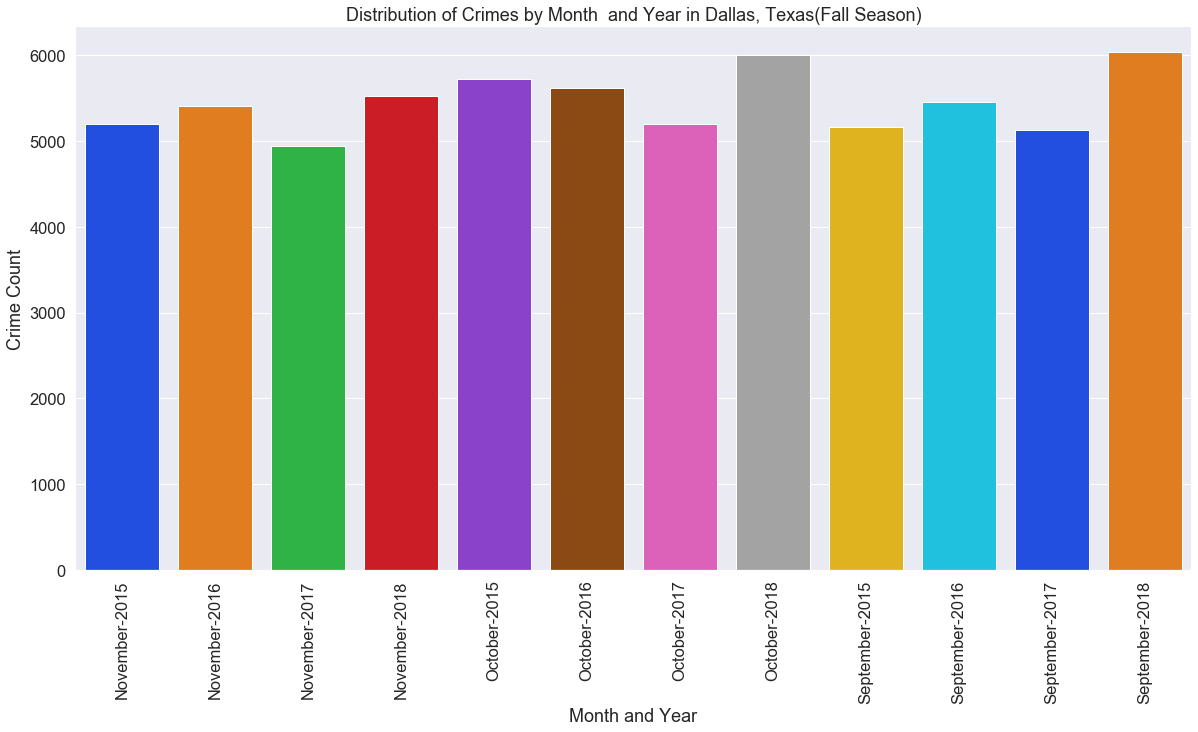

In [36]:
# Looking at Fall visually!
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.barplot(x= 'month_year', y= 'count', data = fall_season, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Month  and Year in Dallas, Texas(Fall Season)')
plt.xlabel('Month and Year')
plt.ylabel('Crime Count');

**Takeaways:**
- Once again 2018 has the highest incidences for this season (October and September)
- November 2017 had the least crimes in this season

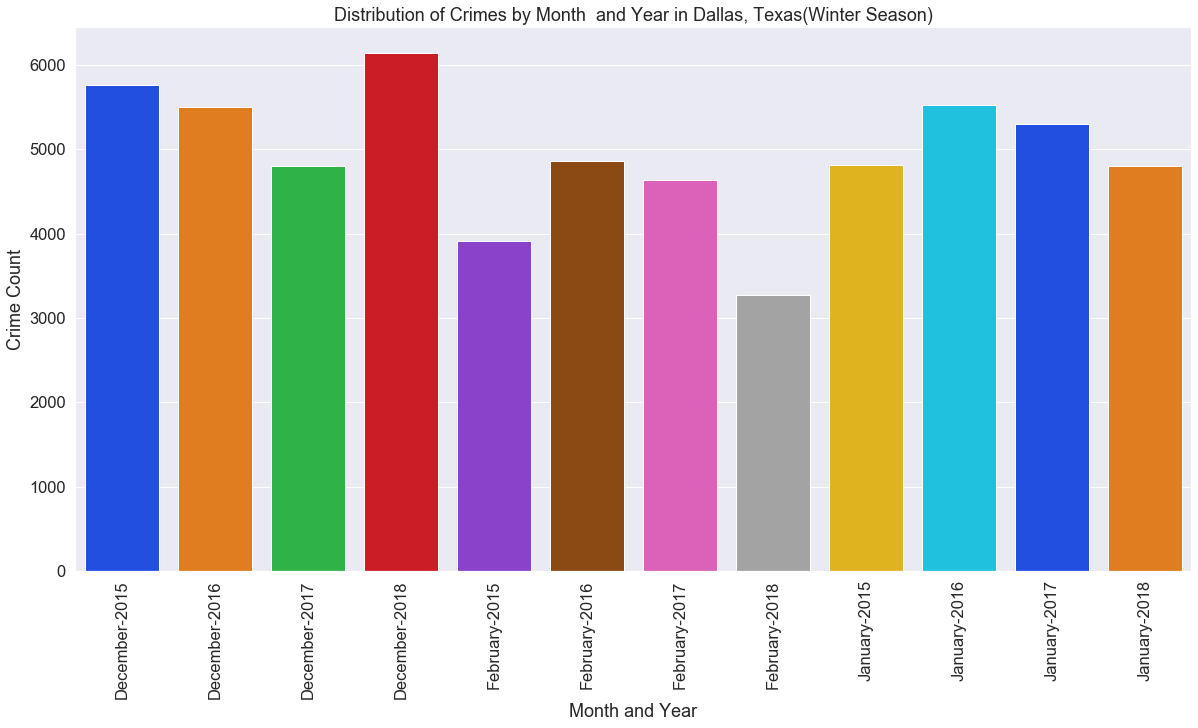

In [37]:
# Looking at Winter visually!
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.barplot(x= 'month_year', y= 'count', data = winter_season, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Month  and Year in Dallas, Texas(Winter Season)')
plt.xlabel('Month and Year')
plt.ylabel('Crime Count');

**Takeaways:**
- December 2018 had the higest number of crimes in this season
- Besides 2017 December is the month with the largest number of crimes followed by January

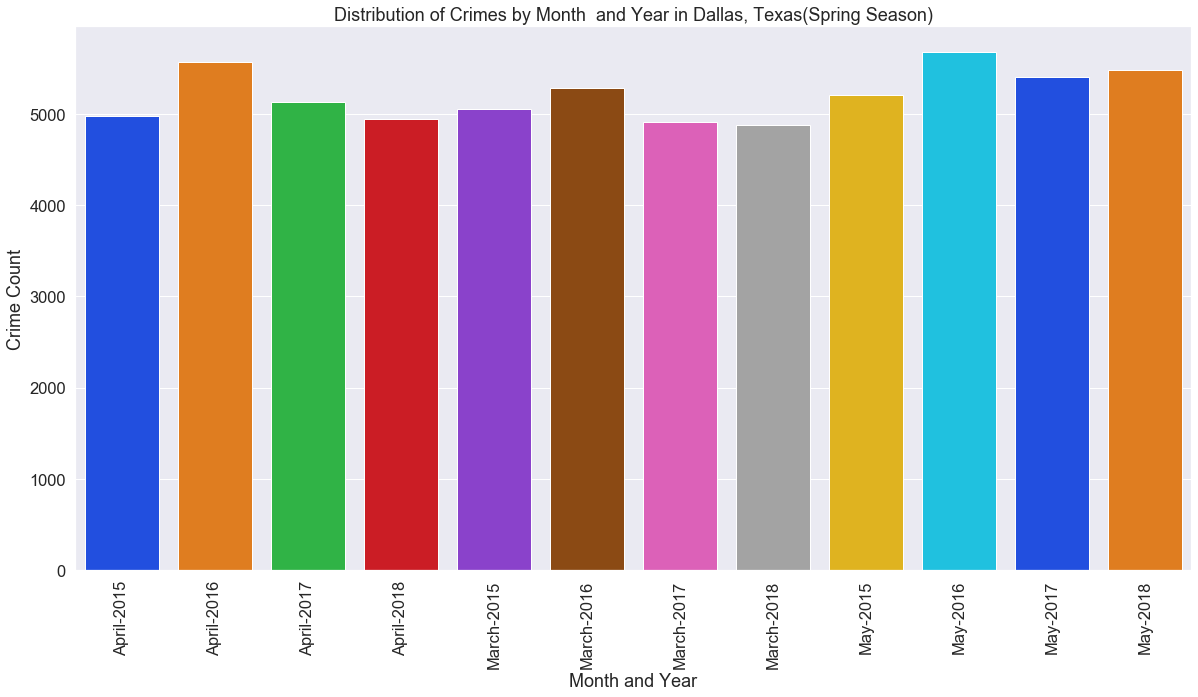

In [38]:
# Looking at Spring visually!
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.barplot(x= 'month_year', y= 'count', data = spring_season, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Month  and Year in Dallas, Texas(Spring Season)')
plt.xlabel('Month and Year')
plt.ylabel('Crime Count');

**Takeaways:**
- May 2016 had the highest number of crimes, followed by April 2016
- March 2017 and 2018 are tied for the lowest number of crimes

**Main Seasonal/Month and Year Takeaways:**
- Summer seems to be a pretty busy time for crimes (it had the largest number of months at or above 6,000 incidents)
- Winter, specifically the months of December and January are next

**Q. What does crime occurrence look like in relation to month?**

In [39]:
# Creating a sub-df for months and counts!
month_count = pd.DataFrame(complete.month.value_counts())

In [40]:
# Cleaning up the sub-df so we can look closer!
month_count.reset_index(inplace = True)
month_count.rename(columns = {'index':'month', 'month':'count'}, inplace = True)
month_count.sort_values(by = 'month', ascending = True, inplace = True)

In [41]:
# So, what do the numbers for this look like?
month_count

,month,count
9,1,20449
11,2,16678
10,3,20140
8,4,20628
5,5,21774
6,6,21746
0,7,22913
1,8,22790
4,9,21786
2,10,22534


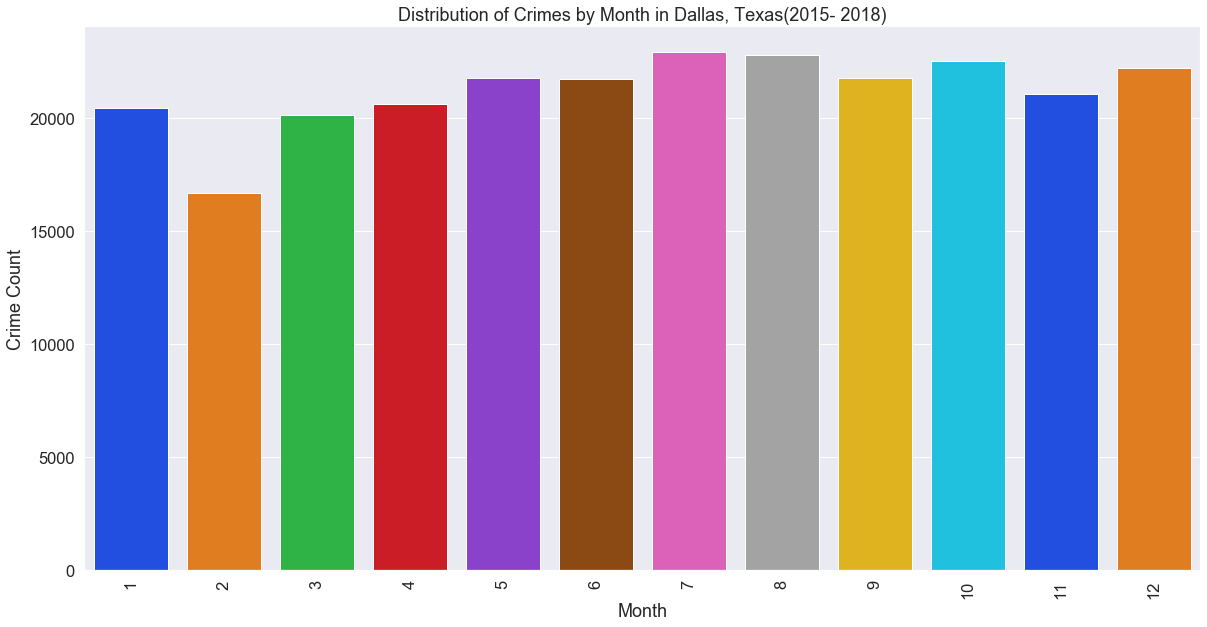

In [42]:
# What does this look like, visually?

plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.barplot(x= 'month', y= 'count', data = month_count, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Month in Dallas, Texas(2015- 2018)')
plt.xlabel('Month')
plt.ylabel('Crime Count');

**Takeaways:**
- Just like we thought: the months with the highest crime counts are 6 (June), 7 (July), and 8 (August)
- Feburary (2) seems to have the lowest number of crimes
- March and April are tied for crime counts (and November is very close)


**Q. What days of the week do we have the most crimes?**

In [43]:
# Creating a sub-df for day of the week counts
weekday_count = pd.DataFrame(complete['day1_of_the_week'].value_counts())

In [44]:
# Cleaning up this new sub-df
weekday_count.reset_index(inplace = True)
weekday_count.rename(columns = {'index':'day_of_week', 'day1_of_the_week':'count'}, inplace = True)

In [45]:
# What does this look like, numberwise?
weekday_count

,day_of_week,count
0,Fri,38426
1,Sat,38315
2,Sun,37716
3,Mon,35674
4,Thu,35671
5,Wed,34645
6,Tue,34277


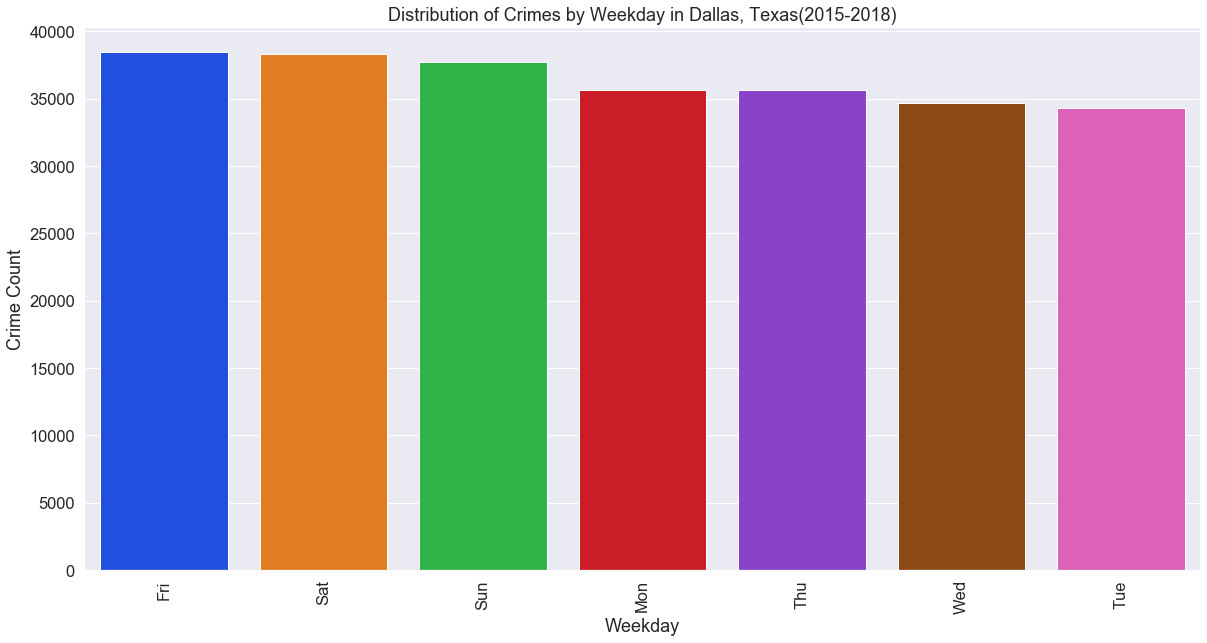

In [46]:
# What does this look like, visually?
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.barplot(x= 'day_of_week', y= 'count', data = weekday_count, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Weekday in Dallas, Texas(2015-2018)')
plt.xlabel('Weekday')
plt.ylabel('Crime Count');

**Takeaways:**
- Friday through Sunday have the highest number of crime calls
- Tuesday and Wednesday have the least amount of crime calls
- Monday and Thursday (the day after and before our highest calls) are tied 

**Q: Is there a particular time of day with the most occurrences?**

In [47]:
#Creating a sub-df for time of day
time_day = pd.DataFrame(complete['time_of_occurrence'].value_counts())

In [48]:
# What does this data look like?
time_day.head(10)

,time_of_occurrence
00:00,9097
22:00,8463
18:00,7434
20:00,7339
21:00,6887
12:00,6838
19:00,6517
08:00,6298
17:00,6083
23:00,5644


In [49]:
# Cleaning up dataset
time_day.reset_index(inplace = True)
time_day.rename(columns = {'index': 'time', 'time_of_occurrence': 'count'}, inplace = True)
time_day.sort_values(by = 'time', ascending = True, inplace = True)

In [50]:
# Checking results
time_day.head(20)

,time,count
0,00:00,9097
43,00:01,1297
301,00:02,55
280,00:03,68
461,00:04,40
100,00:05,374
905,00:06,27
947,00:07,26
306,00:08,54
381,00:09,44


Wow, that is still a lot of data. Let's look at this data by hour to see if we can get a better idea of what times of day most crimes occur in Dallas!

In [51]:
# Converting time to a date time
time_day['time']= pd.to_datetime(time_day['time'])

In [52]:
# Creating a hour variable
time_day['hour'] = time_day['time'].dt.hour

In [53]:
# Visual check
time_day.head(20)

,time,count,hour
0,2019-10-31 00:00:00,9097,0
43,2019-10-31 00:01:00,1297,0
301,2019-10-31 00:02:00,55,0
280,2019-10-31 00:03:00,68,0
461,2019-10-31 00:04:00,40,0
100,2019-10-31 00:05:00,374,0
905,2019-10-31 00:06:00,27,0
947,2019-10-31 00:07:00,26,0
306,2019-10-31 00:08:00,54,0
381,2019-10-31 00:09:00,44,0


In [54]:
# Creating a sub-df to look at these by hour
hour_count = pd.DataFrame(time_day.groupby('hour').sum())

In [55]:
# Typical sub-df cleaning happening here- nothing to see!
hour_count.reset_index(inplace = True)
hour_count.sort_values(by = 'hour', ascending = True, inplace = True)

In [56]:
# What does our info look like?
hour_count

,hour,count
0,0,16637
1,1,9109
2,2,7678
3,3,5947
4,4,4468
5,5,4633
6,6,5443
7,7,7156
8,8,10827
9,9,8794


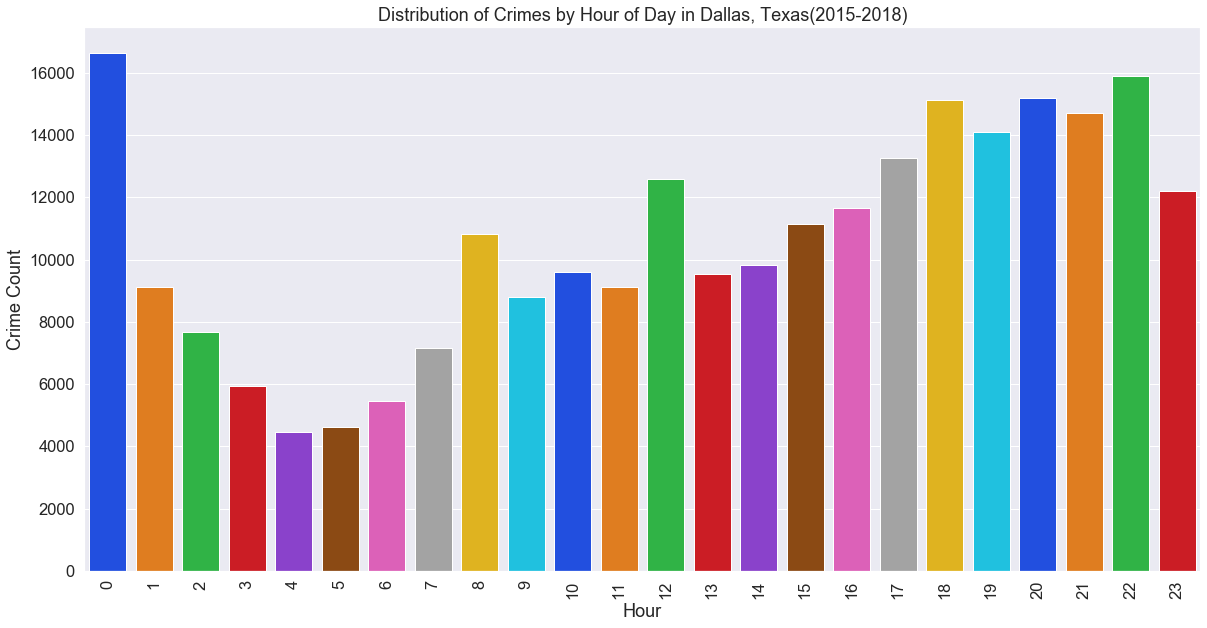

In [57]:
# What does this look like, visually?
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.barplot(x= 'hour', y= 'count', data = hour_count, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Hour of Day in Dallas, Texas(2015-2018)')
plt.xlabel('Hour')
plt.ylabel('Crime Count');

**Takeaways:**
- Most crimes (or calls for crimes, anyway) seem to occurr in the midnight hour
- Very few crimes are reported between 4 and 5 a.m.
- Early evening (5 p.m.) to midnight are the most popular times for crimes to occur
- Surprisingly noon, followed by 8 am, is the most common time for crimes during the day.

Now that we have a better understanding of how hour of day factors into crimes let's now take a look at day of the year (ie: 1 of 365).

**Q: Does day of the year make a difference in our dataset?**

In [58]:
# Yet again, creating another sub-df to look at day of year
day_oy_count = pd.DataFrame(complete['day_of_the_year'].value_counts())

In [59]:
# Typical cleaning of sub-df here!
day_oy_count.reset_index(inplace = True)
day_oy_count.rename(columns = {'index':'day_of_year', 'day_of_the_year': 'count'}, inplace = True)
day_oy_count.sort_values(by = 'day_of_year', ascending = True, inplace = True)

In [60]:
# What does this look like, numberwise?
day_oy_count.head(20)

,day_of_year,count
0,1,1022
278,2,661
287,3,653
306,4,640
307,5,639
333,6,614
338,7,612
263,8,665
325,9,623
226,10,686


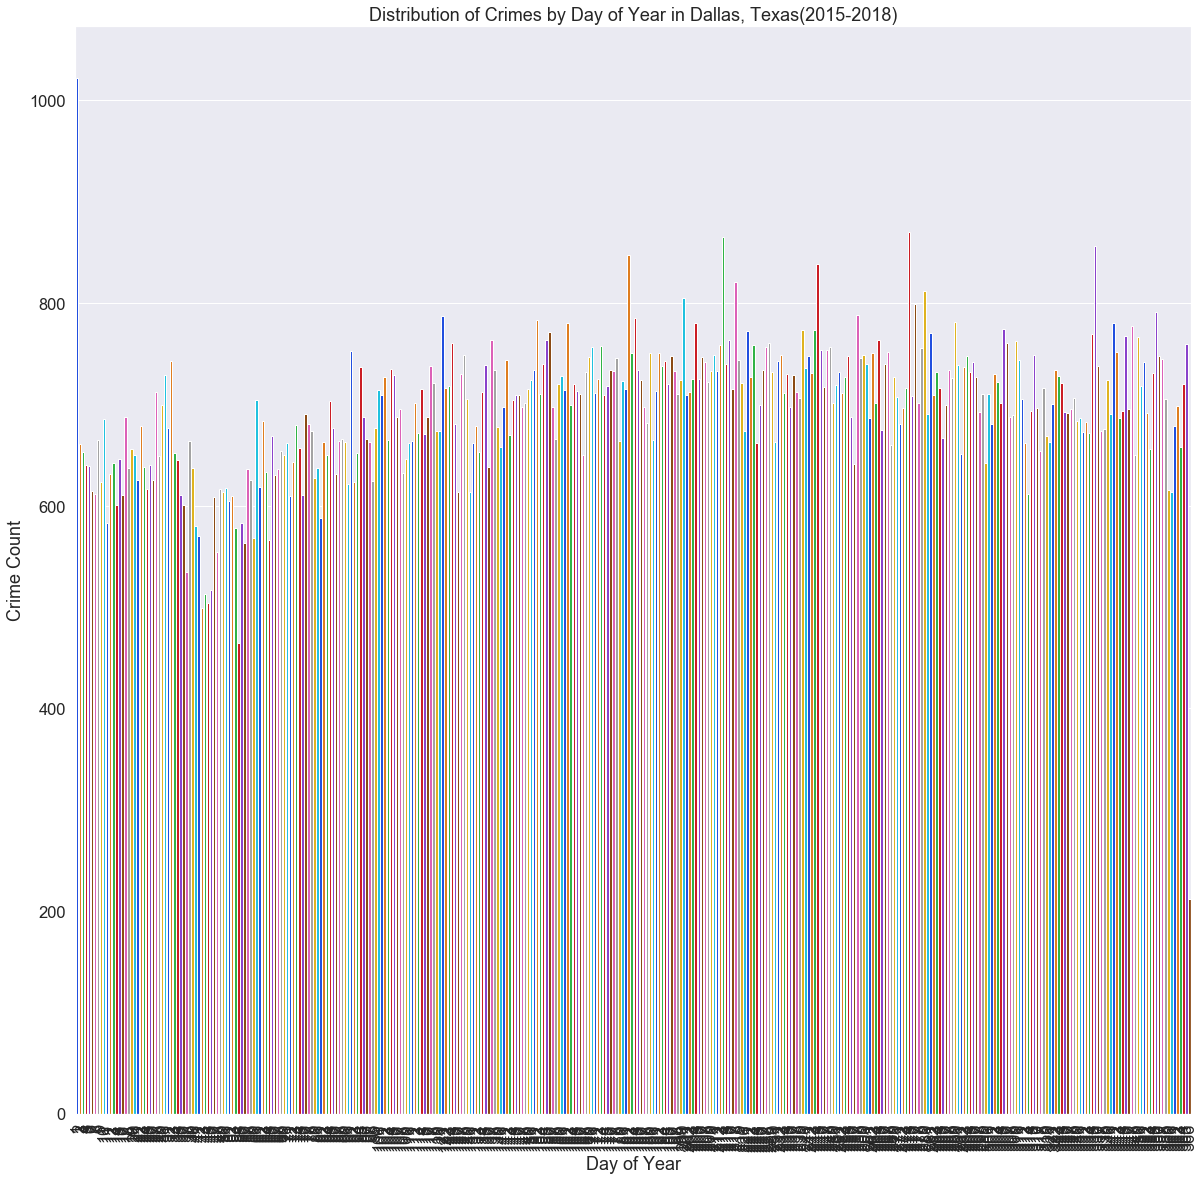

In [61]:
# What does this look like, visually?
plt.figure(figsize = (20,20))
sns.set(font_scale = 1.5)
sns.barplot(x= 'day_of_year', y= 'count', data = day_oy_count, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes by Day of Year in Dallas, Texas(2015-2018)')
plt.xlabel('Day of Year')
plt.ylabel('Crime Count');

WOAH! Wayyy too much info all at once! Let's break this down into 3 parts: days 1-100, days 101- 200, and all remaining days!

In [62]:
# Making subsets for our bins of days
first_days = day_oy_count.loc[day_oy_count['day_of_year']<= 100]
middle_days = day_oy_count.loc[day_oy_count['day_of_year'].between(101, 200)]
last_days = day_oy_count.loc[day_oy_count['day_of_year']> 200]

In [63]:
# Sanity check to make sure all three sub-df actually worked out for us!
first_days

,day_of_year,count
0,1,1022
278,2,661
287,3,653
306,4,640
307,5,639
333,6,614
338,7,612
263,8,665
325,9,623
226,10,686


Sweet! Now that we know what these three groups look like in numbers let's create a visualization for each to see what we can learn about day of year in relation to crime count!

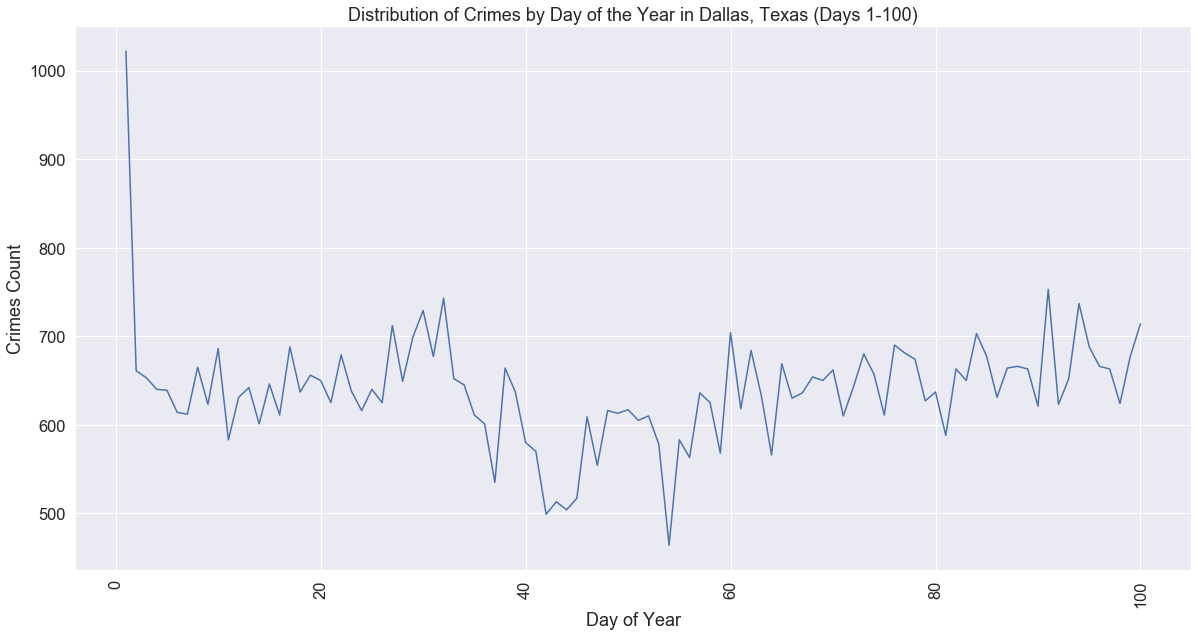

In [64]:
# Switching it up and trying a line plot for this subset of data!
plt.figure(figsize = (20,10))
sns.lineplot(x= 'day_of_year', y = 'count', data = first_days, palette = 'bright')
plt.title('Distribution of Crimes by Day of the Year in Dallas, Texas (Days 1-100)')
plt.xlabel('Day of Year')
plt.ylabel('Crimes Count')
plt.xticks(rotation = 90);

**Takeaways:**
- Most of the major activity here happens on the first few days of the year
- We see some spikes of activity around the 30th day and the 60th day of the year
- Between the 40th and 50th day of the year we see lower numbers of crimes reported

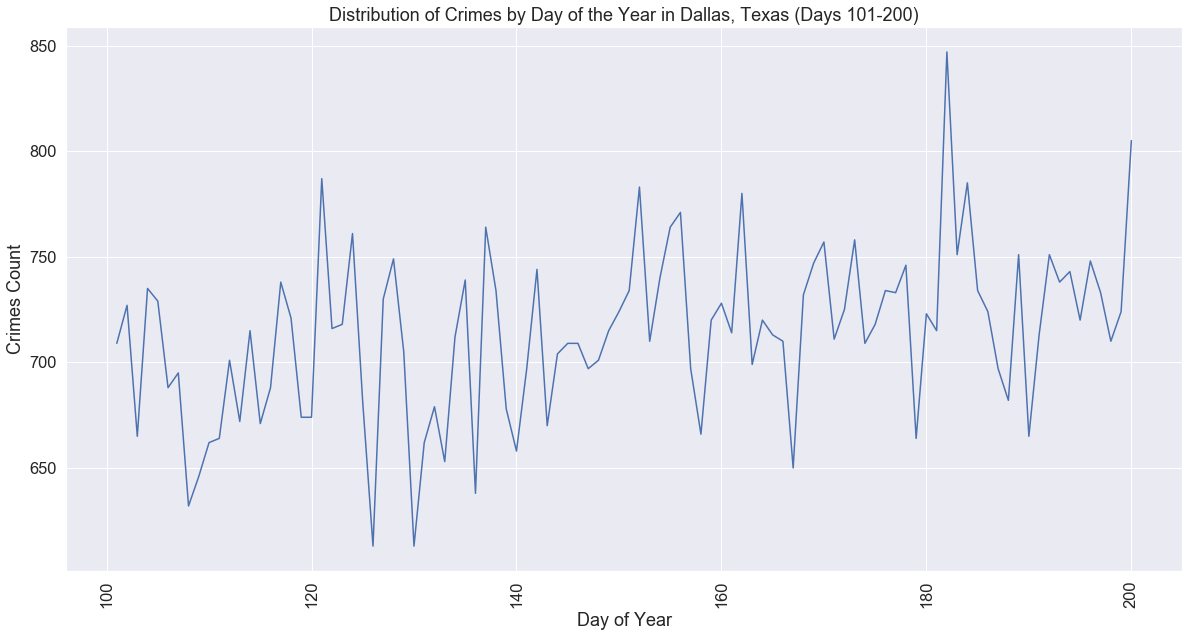

In [65]:
# Looking at middle days
plt.figure(figsize = (20,10))
sns.lineplot(x= 'day_of_year', y = 'count', data = middle_days, palette = 'bright')
plt.title('Distribution of Crimes by Day of the Year in Dallas, Texas (Days 101-200)')
plt.xlabel('Day of Year')
plt.ylabel('Crimes Count')
plt.xticks(rotation = 90);

**Takeaways:**
- Numbers of crime make a dramatic increase between the 180 and 200 day marks
- We see a few weird spikes at various times (around 120 & 180)
- We also see a drastic drop in crimes between 120 and 140 

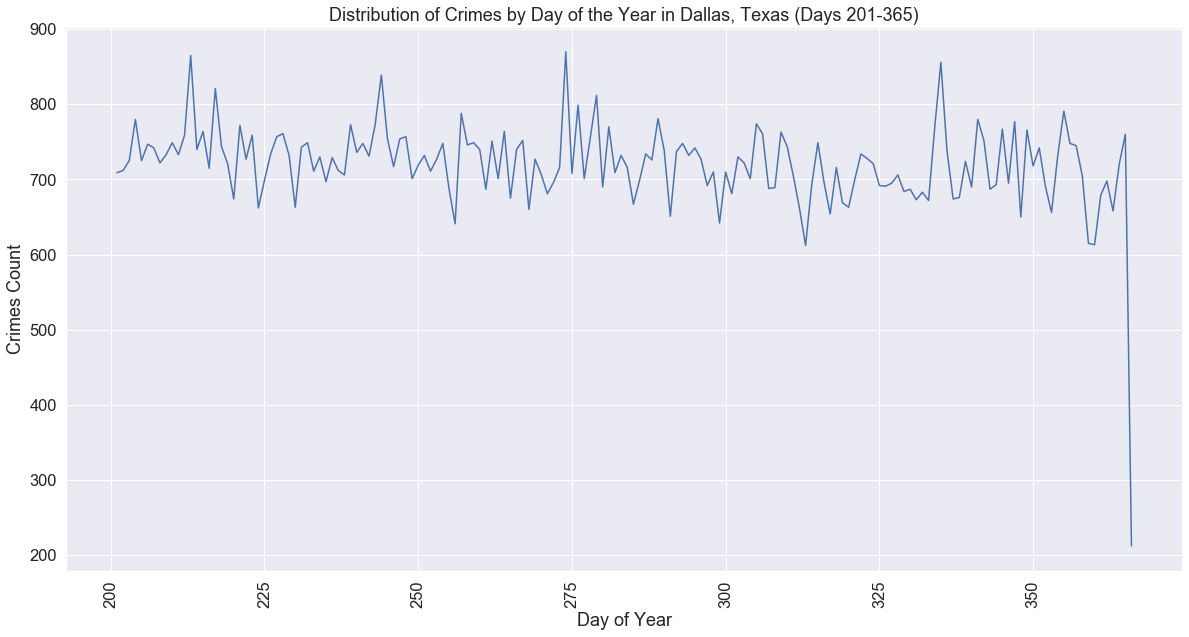

In [66]:
# Finally looking at our last few days of the year
plt.figure(figsize = (20,10))
sns.lineplot(x= 'day_of_year', y = 'count', data = last_days, palette = 'bright')
plt.title('Distribution of Crimes by Day of the Year in Dallas, Texas (Days 201-365)')
plt.xlabel('Day of Year')
plt.ylabel('Crimes Count')
plt.xticks(rotation = 90);

**Takeaways:**
- The amount of crimes reported in this chunk of the year stays pretty consistantly in the 700 to 900 range making it the section of the year with the most crimes
- We see some major spikes around the 275th day and between the 325th and 350th day
- There definately seems to almost be some sort of repeating pattern to this section's data
- We see a huge drop after 350, but that most likely has to do with 2016 being a leap year and having 366 days as opposed to 365

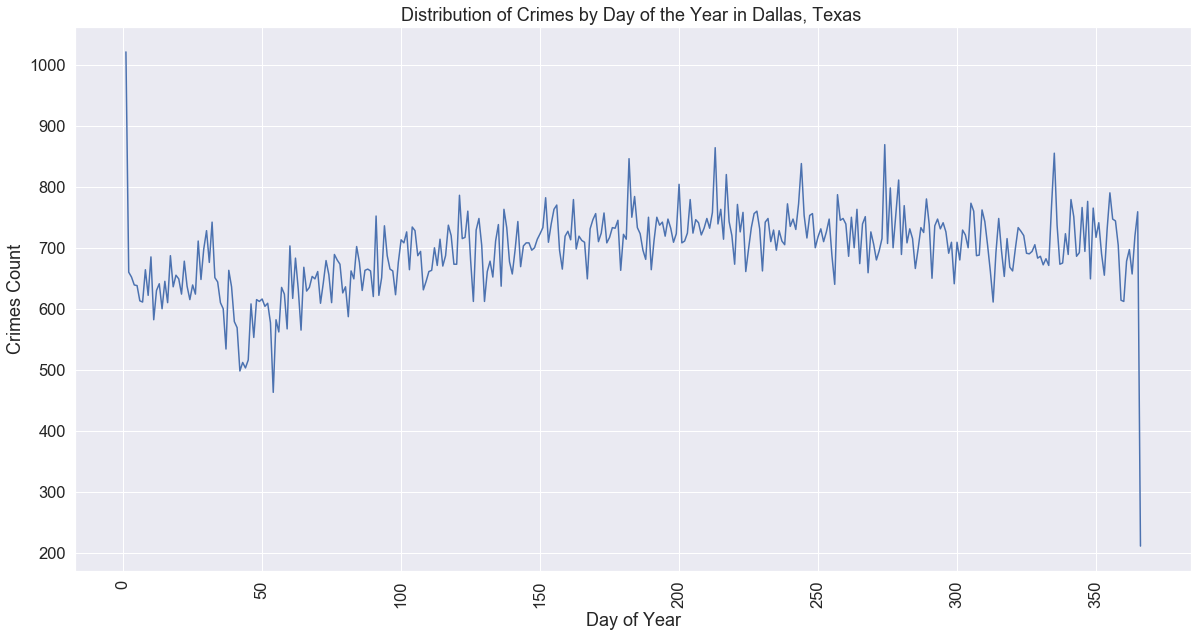

In [67]:
# Can we look at the entire year in a line graph for easier understanding?
plt.figure(figsize = (20,10))
sns.lineplot(x= 'day_of_year', y = 'count', data = day_oy_count, palette = 'bright')
plt.title('Distribution of Crimes by Day of the Year in Dallas, Texas ')
plt.xlabel('Day of Year')
plt.ylabel('Crimes Count')
plt.xticks(rotation = 90);

**Takwaways:** As I mentioned during our analysis of the last few days of the year, 2016 was a leap year and skews our data a bit. With that said we still see that there is seasonality (pretty similar looking patterns in the spikes and valleys) within our data with relation to day of the year and crimes. We can also see that our data almost has an upside down U shape in the middle, thus indicating there is some sort of trend in our data. Interesting! Let's talk about our weather data next!

#### 3.1B: What do our weather data look like?
[Back to Outline](#Project-Outline:-Final-Project-EDA)

In addition to time related features our dataset now has a few features that relate to weather for Dallas, Texas and the times observed. Our weather-related features are:

- Temperature in Farenheit
- Humidity
- Inches of Percipitation

Each of the features above is based on an individual day inside of the scope of our project (1/1/2015 - 12/31/2018).

**Q: What does the distribution of temperatures look like for our time period?**

In [68]:
# Looking at weather counts for this dataset
weather_count = pd.DataFrame(complete['temp_in_F'].value_counts())

In [69]:
# Typical cleaning of sub-df
weather_count.reset_index(inplace = True)
weather_count.rename(columns = {'index':'temp_in_F', 'temp_in_F': 'count'}, inplace = True)
weather_count.sort_values(by = 'temp_in_F', ascending = True, inplace = True)

In [70]:
# Round our temps to make them look neater
weather_count['temp_in_F'] = round(weather_count['temp_in_F'])

In [71]:
# What does this look like?
weather_count.head()

,temp_in_F,count
18,22,236
2,23,487
1300,24,146
1326,24,143
1345,25,141


In [72]:
# Double checking that we only have 1 value per temp
weather_count.temp_in_F.nunique()

75

In [73]:
# Comparing to unique temps
len(weather_count)

1451

In [74]:
# Smushing together all counts for same temp
weather_count = weather_count.groupby('temp_in_F').sum()

In [75]:
# Now we have to clean this up again to make it easier to use
weather_count.reset_index(inplace = True)
weather_count.head()

,temp_in_F,count
0,22,236
1,23,487
2,24,289
3,25,302
4,27,307


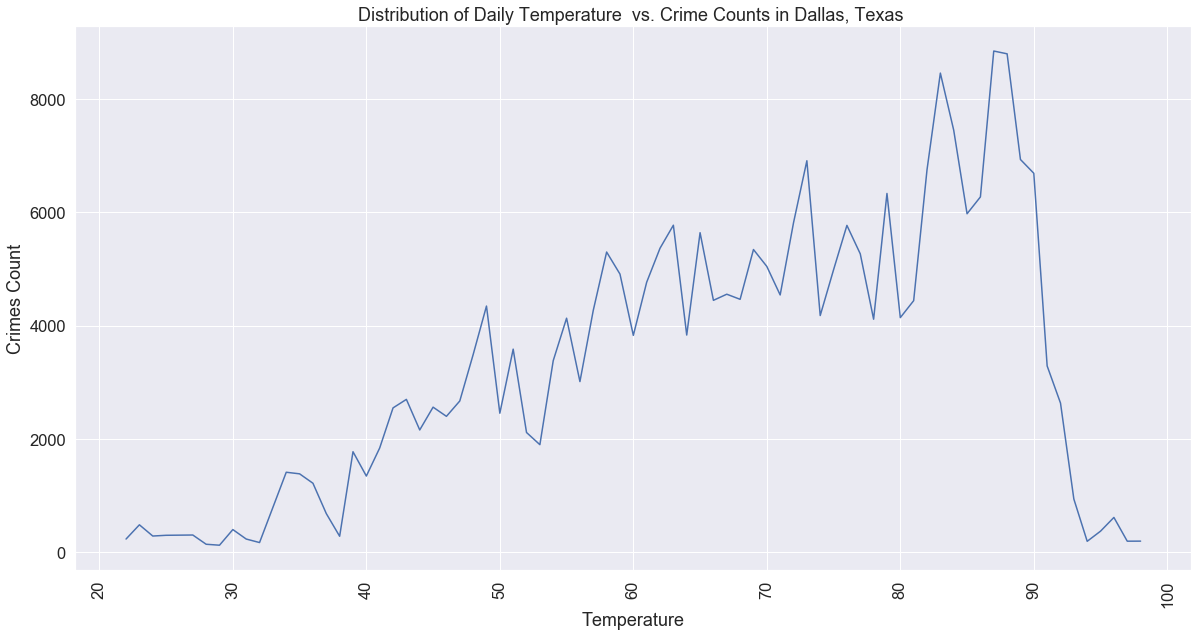

In [76]:
# What does this all look like visually?
plt.figure(figsize = (20,10))
sns.lineplot(x= 'temp_in_F', y = 'count', data = weather_count, palette = 'bright')
plt.title('Distribution of Daily Temperature  vs. Crime Counts in Dallas, Texas ')
plt.xlabel('Temperature')
plt.ylabel('Crimes Count')
plt.xticks(rotation = 90);

**Takeaways:**
- We have the most amounts of crimes reported when the temperature is between 80 to 90 degrees F
- We have lower crime counts when temperatures are below 40 F


Now that we know how crimes compare to the temperature let's see if we can identify what temperatures occur most in this geographic area looking at the original weather information!

In [77]:
# Loading in original weahther info
weather = pd.read_csv('weather_final.csv')

In [78]:
# Just checking what this data looks like
weather.head()

,date,temp_in_F,humidity,percip_inches,year,month,day
0,2015-01-01,34,89,3e-02,2015,1,1
1,2015-01-02,39,97,2e-02,2015,1,2
2,2015-01-03,44,85,2e-02,2015,1,3
3,2015-01-04,35,67,0e+00,2015,1,4
4,2015-01-05,36,61,0e+00,2015,1,5


In [79]:
weather = weather.round(1)

In [80]:
# Getting rid of 2019 data
weather = weather.loc[weather['year'] != 2019]

In [81]:
# Let's group this data by temp and count
temps_count= pd.DataFrame(weather['temp_in_F'].value_counts())

In [82]:
# Did it work?
temps_count.head(10)

,temp_in_F
87,10
73,8
65,8
58,8
63,8
66,8
87,7
88,7
83,7
83,7


In [83]:
# Cleaning this all up
temps_count.reset_index(inplace = True)
temps_count.rename(columns = {'index':'temp_in_F', 'temp_in_F':'count'}, inplace = True)
temps_count.sort_values(by = 'temp_in_F', ascending = True, inplace = True)

In [84]:
# What does this data look like?
temps_count.head(10)

,temp_in_F,count
395,22,1
416,23,1
451,24,1
438,24,1
464,25,1
470,25,1
302,27,2
432,27,1
441,28,1
536,29,1


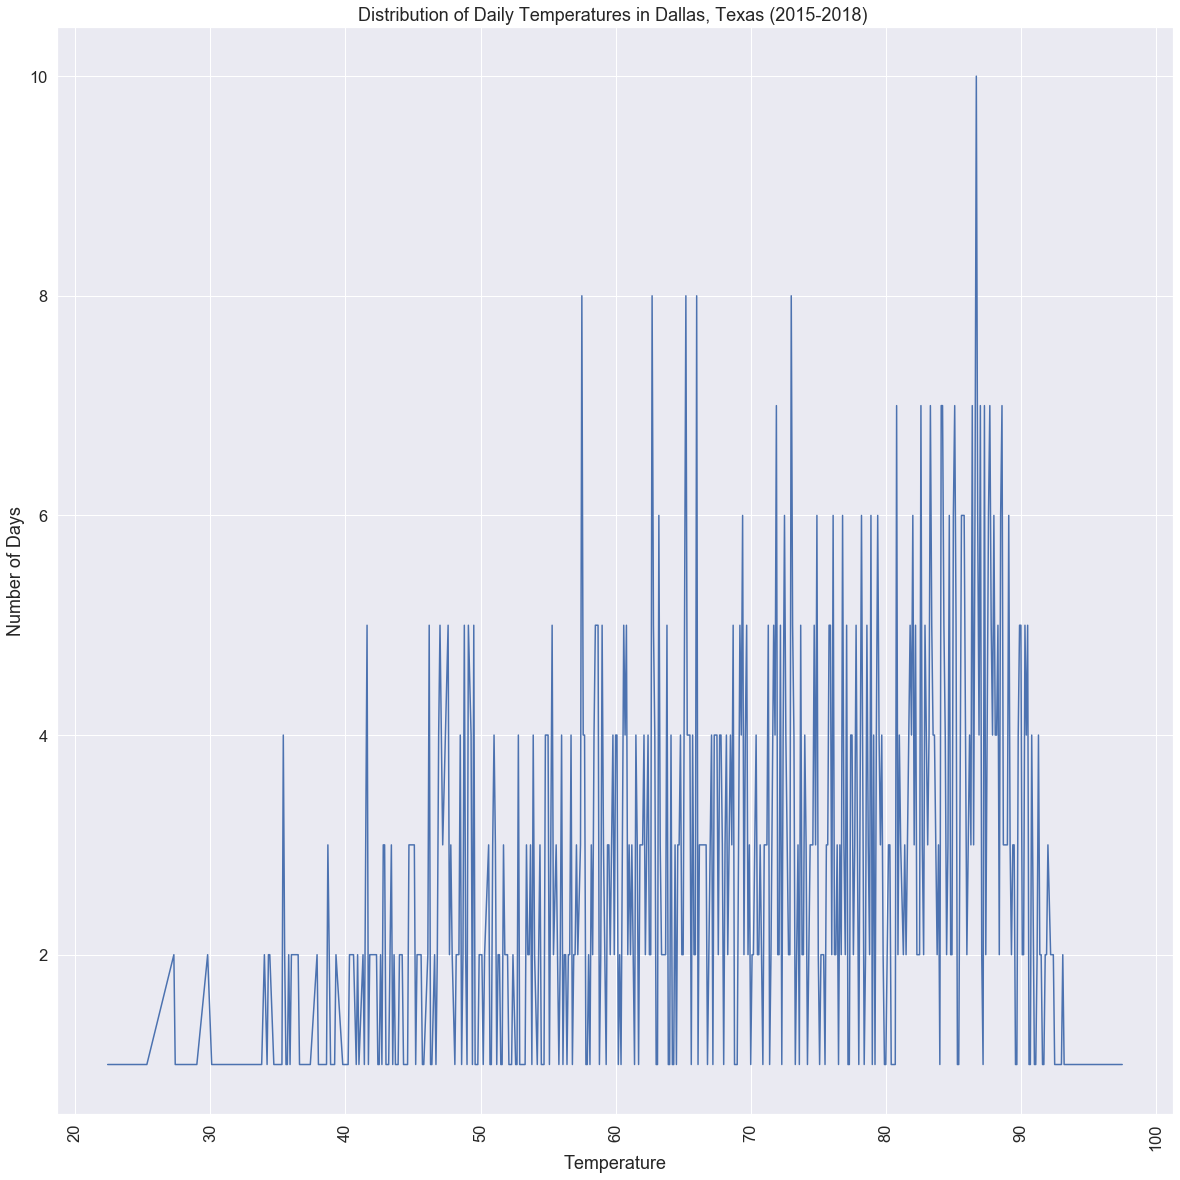

In [85]:
# What does this all look like visually?
plt.figure(figsize = (20,20))
sns.lineplot(x= 'temp_in_F', y = 'count', data = temps_count, palette = 'bright')
plt.title('Distribution of Daily Temperatures in Dallas, Texas (2015-2018) ')
plt.xlabel('Temperature')
plt.ylabel('Number of Days')
plt.xticks(rotation = 90);

There is a ton of data here but we can see that Dallas has very few days with temperatures lower than 40F or higher than 97F. We also can see that spikes around 60-70 degrees and 90 degrees indicate these are some of the most frequently occuring temperatures. I am a bit shocked that there isn't any temperatures in this time frame over 100 F, as summers in Texas get really hot, but since these temperatures are a daily average this makes sense.

**Q:What does the distribution of humidity look like for the scope of our project?**

In [86]:
# Making a humidity sub-df
humidity_count = pd.DataFrame(weather['humidity'].value_counts())

In [87]:
# Typical sub-df cleaning
humidity_count.reset_index(inplace = True)
humidity_count.rename(columns = {'index':'%_humidity', 'humidity':'count'}, inplace = True)
humidity_count.sort_values(by = '%_humidity', ascending = True, inplace = True)

In [88]:
# What does this look like, numbers wise?
humidity_count.head(20)

,%_humidity,count
377,23,1
378,31,1
491,31,1
441,32,1
357,34,1
401,35,1
414,36,1
461,36,1
369,36,1
447,36,1


In [89]:
# Rounding this info to make smushing easier
humidity_count['%_humidity'] = round(humidity_count['%_humidity'])

In [90]:
# We have repeated numbers for humidities. Let's see if we can smush all of the counts for humidities together
humidity_count = humidity_count.groupby('%_humidity').sum()

In [91]:
# Resetting our index
humidity_count.reset_index(inplace = True)

In [92]:
# Checking our new data organization
humidity_count.head(10)

,%_humidity,count
0,23,1
1,31,2
2,32,1
3,34,1
4,35,1
5,36,4
6,37,1
7,38,6
8,39,4
9,40,4


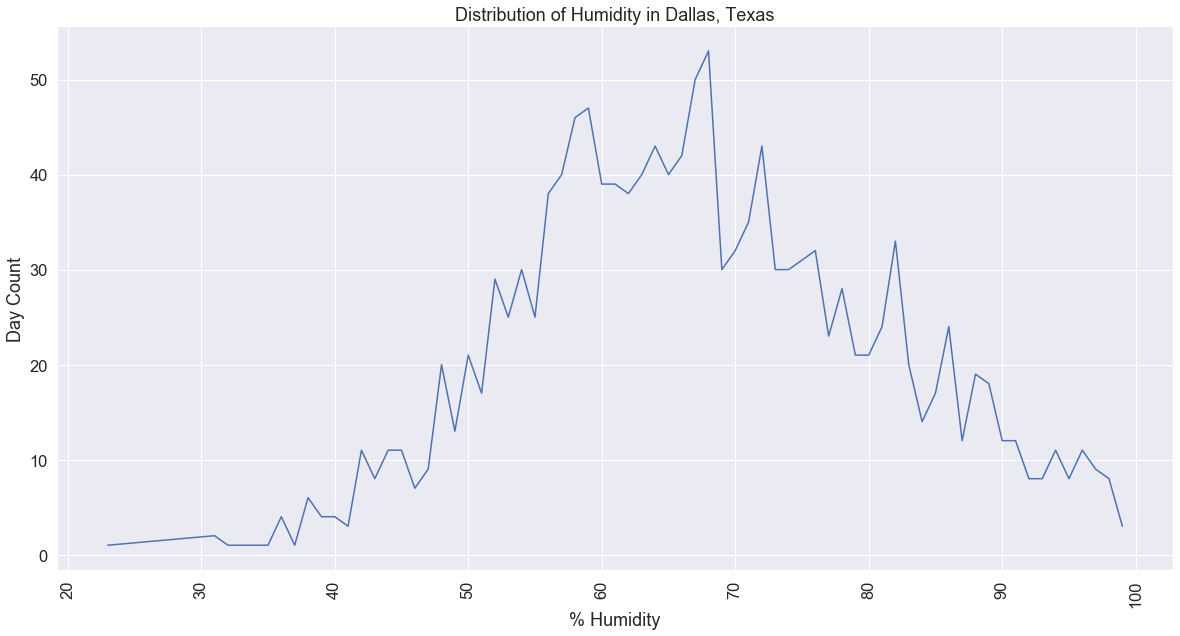

In [93]:
# Let's take a quick look at overall humidity for the scope of our project
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.lineplot(x= '%_humidity', y= 'count', data = humidity_count, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Humidity in Dallas, Texas')
plt.xlabel('% Humidity')
plt.ylabel('Day Count');

**Takeaways**:
Since this is the overall measurement of humidity for the time scope of this project we see that our humidiy in Dallas, Texas is typicall between 55-70%. Let's compare this to the humidity counts for our crime data!

In [94]:
# Making a crime humidity sub-df
crime_humidity = pd.DataFrame(complete['humidity'].value_counts())

In [95]:
# Typical sub-df cleaning
crime_humidity.reset_index(inplace = True)
crime_humidity.rename(columns = {'index':'%_humidity', 'humidity':'count'}, inplace = True)
crime_humidity.sort_values(by = '%_humidity', ascending = True, inplace = True)

In [96]:
# What do crimes and humidity look like?
crime_humidity.head(20)

,%_humidity,count
1331,23,143
1176,31,154
254,31,196
1235,32,150
166,34,203
1369,35,138
275,36,195
393,36,188
686,36,175
711,36,175


In [97]:
# Rounding this info to make smushing easier
crime_humidity['%_humidity'] = round(crime_humidity['%_humidity'])

# We have repeated numbers for humidities. Let's see if we can smush all of the counts for humidities together
crime_humidity = crime_humidity.groupby('%_humidity').sum()

# Resetting our index
crime_humidity.reset_index(inplace = True)

In [98]:
# What does this data look like now?
crime_humidity.head(20)

,%_humidity,count
0,23,143
1,31,350
2,32,150
3,34,203
4,35,138
5,36,733
6,37,414
7,38,903
8,39,693
9,40,670


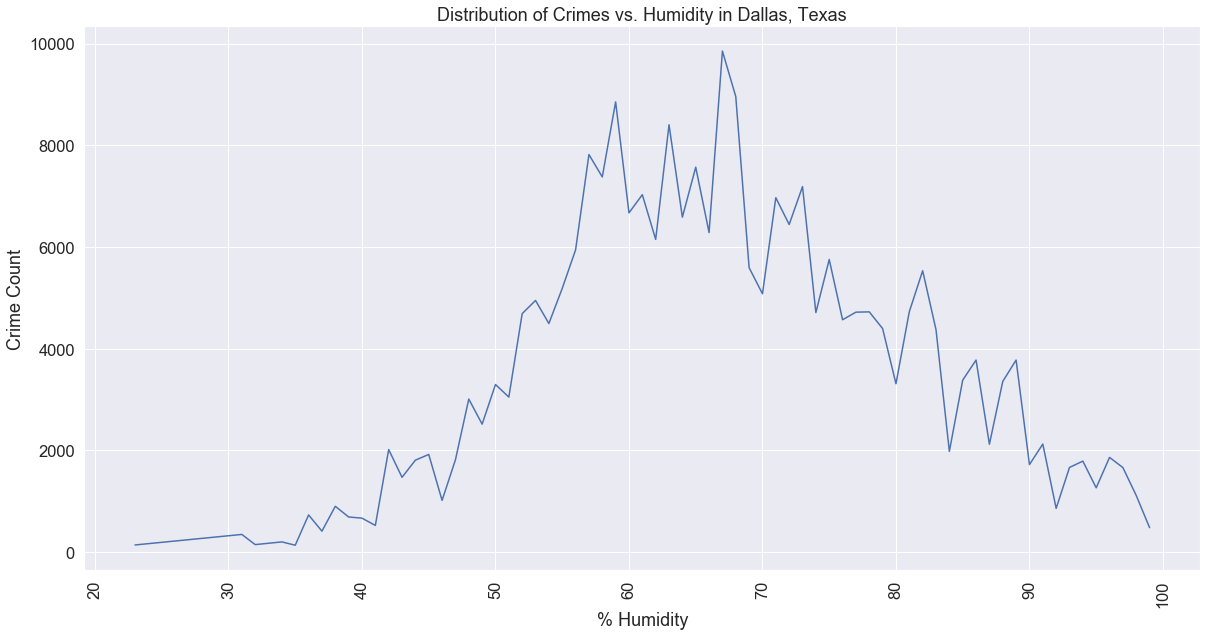

In [99]:
# Let's take a quick look at overall humidity vs. crimes for the scope of our project
plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5)
sns.lineplot(x= '%_humidity', y= 'count', data = crime_humidity, palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Distribution of Crimes vs. Humidity in Dallas, Texas')
plt.xlabel('% Humidity')
plt.ylabel('Crime Count');

**Takeaways:**
- Our amount of crimes per humidity pretty much echos the distribution of umidity in Dallas for the time period
- We have the majority of days in the 55-70% humidity range which is the same as our crime count

**Q: What does percipitation, in inches, look like over our time period?**

In [100]:
# What is the max number of inches of rain in this timeframe?
weather['percip_inches'].max()

0.4

Texas has been in a drought for over 10 years so our rainfall information will not be very interesting! MOVING ON!

#### 3.1C: What do our census demographic data look like?
[Back to Outline](#Project-Outline:-Final-Project-EDA)

Finally, let's take a look at the demographic information for this period as provided by our census data.

**Q: What does population look like over this time frame?**

In [101]:
# Loading in our final census information for further exploring!
census = pd.read_csv('census_final.csv')

In [102]:
# What does our imported data look like?
census.head()

,Unnamed: 0,year,zip_code,total_pop,male,female,%_male,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty
0,0,2015,75201,30425,16623,13802,55,45,33,96,96,7,4,72,1e+01,12,6e+00,15,3264,3264,84,2,125623,7,12
1,1,2015,75202,16205,9127,7078,57,43,33,95,94,5,3,65,2e+01,11,5e+00,13,3846,3846,81,4,105410,11,18
2,2,2015,75203,39159,20019,19140,50,50,32,70,66,12,10,58,3e+01,4,5e-01,58,2620,2620,53,8,43295,34,38
3,3,2015,75204,43764,22883,20881,52,48,32,90,88,11,8,72,1e+01,9,6e+00,24,3284,3284,76,4,93591,16,20
4,4,2015,75205,34840,17024,17816,49,51,39,80,75,18,14,90,8e-01,10,5e+00,6,2843,2843,65,3,226242,2,6


In [103]:
# Getting rid of that Unnamed column!
census.drop(columns = 'Unnamed: 0', inplace = True)

In [104]:
# Creating a sub-df for population info
pop_info = census[['year', 'zip_code', 'total_pop']]

In [105]:
# Breaking pop down by years
pop2015 = pop_info.loc[pop_info['year']== 2015]
pop2016 = pop_info.loc[pop_info['year']== 2016]
pop2017 = pop_info.loc[pop_info['year']== 2017]
pop2018 = pop_info.loc[pop_info['year']== 2018]

In [106]:
# Turning populations into lists
list_2015 = pop2015['total_pop'].tolist()
list_2016 = pop2016['total_pop'].tolist()
list_2017 = pop2017['total_pop'].tolist()
list_2018 = pop2018['total_pop'].tolist()

In [107]:
# Getting zipcodes
zips = pop2015['zip_code'].tolist()

In [108]:
# Combining everything
total_pops = pd.DataFrame()
total_pops['zip_code'] = zips
total_pops['2015_pops'] = list_2015
total_pops['2016_pops'] = list_2016
total_pops['2017_pops'] = list_2017
total_pops['2018_pops'] = list_2018

In [109]:
# Did it work?
total_pops

,zip_code,2015_pops,2016_pops,2017_pops,2018_pops
0,75201,30425,32488,35336,36325
1,75202,16205,17304,19144,19680
2,75203,39159,39401,39608,40717
3,75204,43764,44941,46151,47443
4,75205,34840,35101,35344,36333
5,75206,53930,53832,54097,55611
6,75207,17492,17268,17952,18455
7,75208,41872,42070,41955,43130
8,75209,33566,32860,33468,34405
9,75210,11803,12713,13005,13369


Since this is a lot of information let's save the deeper analysis of population for our Tableau dashboard!

**Q: What does income in Dallas city limits look like over time?**

In [110]:
# Creating a smushed income df
income_df = census.groupby('year').mean()

In [111]:
# Keeping just incomes
income_df= pd.DataFrame(income_df['mean_household_income'])

In [112]:
# What does this look like?
income_df

,mean_household_income
year,
2015,85758
2016,88712
2017,94095
2018,136696


In [113]:
# What is the max income in this timeframe?
census['mean_household_income'].max()

295378.6

In [114]:
# What is the minimum income in this timeframe?
census['mean_household_income'].min()

28553.2

According to the 2017 U.S. Census the mean income for Dallas County was 81,182  while the median income was 50,627. These figures are pretty close to the information we have for areas within Dallas city limits. Let's break down our income into more distinct groups: lower income (below 45,000 USD), middle income (45,000 - 135,000 USD), and upper income (above 135,000 USD).

In [115]:
# Creating our income bins
lower_income = census.loc[census['mean_household_income']<45000]
middle_income = census.loc[census['mean_household_income'].between(45000, 135000)]
upper_income = census.loc[census['mean_household_income']> 135000]

**Q: What do residents of lower income look like demographically?**

In [117]:
# How many zip codes are in the lower income?
lower_income['zip_code'].unique()

array([75203., 75210., 75212., 75215., 75216., 75217., 75224., 75227.,
       75232., 75233., 75237., 75241.])

In [118]:
# Do these zip codes stay in the lower income each of the 4 years we have census data for or do they change?
lower_income['zip_code'].value_counts()

75241    3
75216    3
75210    3
75237    3
75217    3
75215    3
75232    2
75212    2
75224    1
75203    1
75227    1
75233    1
Name: zip_code, dtype: int64

In [120]:
# Wait... I thought we have four years of data. Let's check how many years are in the lower income
lower_income['year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [124]:
# Do the other data chunks have all three years?
middle = middle_income['year'].unique()
upper = upper_income['year'].unique()

print(middle)
print(upper)

[2015 2016 2017 2018]
[2015 2016 2017 2018]


Well, that's odd! Our lower income data is only from 2015 - 2017, but since we didn't have broken down data for the 2018 census this makes sense. Let's look a little deeper at the maximun, minimum, and average incomes in this group.

In [125]:
# What is the max income in this group?
lower_income['mean_household_income'].max()

44963.7

In [126]:
# What is the minimum income in this group?
lower_income['mean_household_income'].min()

28553.2

In [127]:
# What is the average income in this group?
lower_income['mean_household_income'].mean()

39926.561538461545

In [128]:
# What do the basic descriptive statistics look like for this group?
lower_income.describe(include = 'all')

,year,zip_code,total_pop,male,female,%_male,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty
count,3e+01,26,26,26,26,26,26,26,26,26,26,26,26,26,26,3e+01,26,26,26,26,26,26,26,26
mean,2e+03,75222,49968,23790,26178,47,53,33,71,67,13,11,38,56,9,3e-01,37,3311,3311,51,6,39927,30,33
std,8e-01,12,31056,15149,15956,2,2,3,4,4,3,2,18,21,8,3e-01,19,863,863,5,1,4647,4,5
min,2e+03,75203,11803,5538,6265,44,50,28,65,61,9,7,20,21,0,0e+00,17,1760,1760,40,3,28553,25,28
25%,2e+03,75215,26753,12914,13452,46,51,30,69,64,10,8,24,34,4,1e-01,22,2678,2678,48,6,37189,27,29
50%,2e+03,75217,44794,21244,23093,47,53,34,72,68,14,11,27,68,7,2e-01,25,3786,3786,51,6,41426,29,32
75%,2e+03,75233,66248,32284,33964,49,54,35,73,69,16,13,57,72,12,6e-01,57,4019,4019,54,8,43885,31,37
max,2e+03,75241,117470,56838,60632,50,56,39,79,76,17,14,70,77,31,1e+00,69,4510,4510,61,9,44964,40,44


**Takeaways:**

Looking at the descriptive statistics above we see several interesting things about this group, such as:
- Around 50,000 people live in this income group per year
- This group tends to have a larger percentage of female residents
- The median age for this group is 33
- Age-wise this group tends to mostly be over 18 (71% of residents) with around 13% of residents 62 years old or older (as age increases the number of corresponding residents decreases)
- This group is predominately Black/African American (56%) and has slightly more white (38%) residents than Hispanic (37%)
- On average 51% of this population is employed with only 6% unemployed.
- 33% of families and 30% of all adults are considered to be in poverty.

Next, let's take a look at our middle income population.

**Q: What do middle income residents look like demographically?**

In [130]:
# What are the max, min, and average incomes for this group?
midmax = middle_income['mean_household_income'].max()
midmin= middle_income['mean_household_income'].min()
midavg= middle_income['mean_household_income'].mean()

print('The maximum income in this population is ', midmax)
print('The minimum income in this population is ', midmin)
print('The average income in this population is ', midavg)

The maximum income in this population is  133428.0
The minimum income in this population is  45217.0
The average income in this population is  89067.97878787876


In [131]:
# What zip codes are in this area and with what frequency?
middle_income['zip_code'].value_counts()

75231    4
75238    4
75236    4
75235    4
75207    4
75208    4
75211    4
75234    4
75390    4
75243    4
75249    4
75218    4
75247    4
75253    4
75228    4
75226    4
75223    4
75246    4
75219    3
75224    3
75203    3
75206    3
75227    3
75220    3
75202    3
75214    3
75201    3
75204    3
75270    3
75248    3
75254    3
75233    3
75287    3
75240    3
75232    2
75212    2
75244    2
75237    1
75217    1
75210    1
75216    1
75215    1
75241    1
Name: zip_code, dtype: int64

In [132]:
# How many zip codes are in this list?
middle_income['zip_code'].nunique()

43

**Takeaways:**
- There is a much larger number of zip codes in this slice of the population of Dallas
- 18 zip codes out of 43 are consistantly in this population each of the four years.

Let's look at our basic descriptive statistics for this population.

In [133]:
middle_income.describe(include = 'all')

,year,zip_code,total_pop,male,female,%_male,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty
count,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,1e+02,132,132,132,132,132,132,132,132
mean,2016,75235,42640,21579,20995,52,48,34,79,75,12,9,63,22,19,4e+00,37,11415,4147,63,4,89068,19,21
std,1,33,26997,13129,13654,5,5,3,9,10,3,3,13,14,22,2e+00,16,15579,1799,12,1,27857,8,7
min,2015,75201,3031,1355,1258,45,29,28,66,61,4,2,25,4,0,2e-01,13,2285,2285,22,2,45217,4,5
25%,2016,75215,17446,9070,8805,49,47,32,71,67,10,8,52,11,6,2e+00,24,3265,2974,60,3,63669,13,17
50%,2016,75231,42313,21464,20926,50,50,34,76,73,12,10,63,18,11,3e+00,34,4063,3649,64,4,87559,19,23
75%,2017,75244,55170,27832,27834,53,51,35,86,81,14,11,74,32,20,5e+00,50,10244,4368,69,4,114702,25,26
max,2018,75390,120759,57559,59065,71,55,42,96,96,21,17,88,71,106,9e+00,80,81292,10621,84,7,133428,35,36


**Takeaways:**
- Around 43,000 people live in this population on average
- This demographic group is predominately male (52%)
- The median age is 34
- A large percentage (79%) of this group is over 18, but there are less 65 and over residents than in the lower income group
- This group is majority white (63%), followed by Hispanic (37%) 
- Interestingly this group has a larger percentage of individuals who identify as Native (19%)
- 63% of this group is employed (4% are unemployed)
- 19% of families and 21% of adults are considered to impoverished

Let's move on to our upper income population.

**Q: What do upper income residents look like demographically?**

In [134]:
# What are the max, min, and average incomes for this group?
upmax = upper_income['mean_household_income'].max()
upmin= upper_income['mean_household_income'].min()
upavg= upper_income['mean_household_income'].mean()

print('The maximum income in this population is ', upmax)
print('The minimum income in this population is ', upmin)
print('The average income in this population is ', upavg)

The maximum income in this population is  295378.6
The minimum income in this population is  135204.5
The average income in this population is  177809.69047619044


In [135]:
# What zip codes are in this population and how many times each?
upper_income['zip_code'].value_counts()

75225    4
75229    4
75209    4
75230    4
75205    4
75251    4
75252    4
75244    2
75214    1
75201    1
75202    1
75204    1
75270    1
75254    1
75219    1
75248    1
75220    1
75206    1
75287    1
75240    1
Name: zip_code, dtype: int64

In [136]:
# How many zip codes are in this population?
upper_income['zip_code'].nunique()

20

**Takeaways:**
- 7 out of 20 zip codes are consistantly considered to be in the upper income 
- The remaining 13 zip codes are lest frequently occuring in this population

In [137]:
# What do basic descriptive statistics look like for this population?
upper_income.describe(include= 'all')

,year,zip_code,total_pop,male,female,%_male,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty
count,42,42,42,42,42,42,42,42,42,42,42,42,42,4e+01,42,42,42,42,42,42,4e+01,42,42,42
mean,2017,75230,31897,15725,16381,49,51,40,79,77,19,16,77,9e+00,4,5,22,15141,3289,65,2e+00,177810,13,13
std,1,21,17720,8941,9241,2,2,6,4,5,7,6,11,6e+00,3,1,11,13510,837,4,7e-01,41653,9,6
min,2015,75201,3330,1544,1585,46,44,32,74,69,8,6,53,6e-01,0,3,5,2312,2312,56,1e+00,135204,2,4
25%,2016,75209,17812,8680,9002,48,50,36,76,73,15,11,69,4e+00,1,4,8,2849,2830,63,2e+00,147819,5,7
50%,2017,75229,36329,17488,18333,49,51,40,79,76,18,14,76,7e+00,3,5,25,5766,3043,65,2e+00,164348,11,12
75%,2018,75250,44625,21545,22109,50,52,43,82,80,23,19,87,1e+01,5,6,29,26028,3559,68,3e+00,187548,21,17
max,2018,75287,69146,37725,38712,56,54,52,88,86,34,30,93,2e+01,15,8,42,47908,5855,75,5e+00,295379,27,23


**Takeaways:**
- This group has, by far, the least inhabitants on average (around 32,000)
- This group is predominately female (51%) and over 18 years old (79%)
- The largest number of individuals over 65 are in this group (16%)
- The racial makeup of this population is predominately white with the lowest number of Hispanic residents (22%) in Dallas
- 65% of this population is employed with 2% unemployed
- Within these zip codes 13% of both families and individuals, respectively, are considered to be in poverty.

**Q: What does gender look like in this time frame?**

In [139]:
# What does the overall breakdown of male to female look like in Dallas, Texas for this time frame?
maletot = census['%_male'].mean()
femtot = census['%_female'].mean()
print('The percentage of male residents of Dallas is ', maletot)
print('The percentage of female residents of Dallas is ', femtot)

The percentage of male residents of Dallas is  50.579999999999984
The percentage of female residents of Dallas is  49.29500000000001


In [141]:
# What does this look like over time?
year_avg= census.groupby(['year']).mean()
year_avg

,zip_code,total_pop,male,female,%_male,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty
year,,,,,,,,,,,,,,,,,,,,,,,
2015,75232,40218,20150,20068,51,49,35,79,75,13,11,62,24,18,3,33,3876,3876,61,5,85758,18,21
2016,75232,40830,20483,20347,51,49,35,79,75,14,11,63,24,16,3,33,3929,3929,61,4,88712,17,21
2017,75232,41568,20826,20742,51,49,35,79,75,14,11,64,24,16,3,33,4005,4005,62,4,94095,16,20
2018,75232,42732,21090,21642,50,50,34,76,73,13,11,62,23,8,5,37,32766,3622,64,3,136696,26,23


In [146]:
year_avg.reset_index(inplace= True)

gender_tot = year_avg[['year', '%_male', '%_female']]

In [148]:
gender_tot.set_index('year', inplace = True)

In [149]:
gender_tot

,%_male,%_female
year,,
2015,51,49
2016,51,49
2017,51,49
2018,50,50


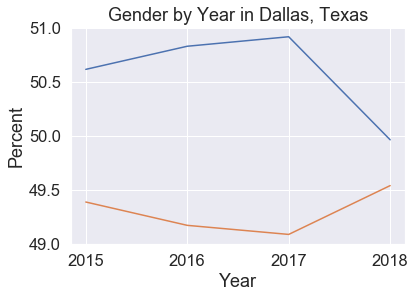

In [152]:
# What does this look like visually?
plt.plot(gender_tot)
plt.title('Gender by Year in Dallas, Texas')
plt.xlabel('Year')
plt.ylabel('Percent');

Overall Dallas seems to be predominately male in the scope of our project. Let's look at age breakdown next.

**Q: What does age breakdown look like in this time frame?**

In [153]:
year_avg

,year,zip_code,total_pop,male,female,%_male,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty
0,2015,75232,40218,20150,20068,51,49,35,79,75,13,11,62,24,18,3,33,3876,3876,61,5,85758,18,21
1,2016,75232,40830,20483,20347,51,49,35,79,75,14,11,63,24,16,3,33,3929,3929,61,4,88712,17,21
2,2017,75232,41568,20826,20742,51,49,35,79,75,14,11,64,24,16,3,33,4005,4005,62,4,94095,16,20
3,2018,75232,42732,21090,21642,50,50,34,76,73,13,11,62,23,8,5,37,32766,3622,64,3,136696,26,23


On average Dallas' population is typically over 18 years old (79% of total population) with around 11% of residents retirement age or older. 

**Q: What does race breakdown look like in this time frame?**

In [154]:
race_breakdown = year_avg[['year', '%_white', '%_black', '%_native', '%_asian', '%_hispanic']]
race_breakdown

,year,%_white,%_black,%_native,%_asian,%_hispanic
0,2015,62,24,18,3,33
1,2016,63,24,16,3,33
2,2017,64,24,16,3,33
3,2018,62,23,8,5,37


For the three years we have solid, reported data (2015- 2017) we see very little change in the racial breakdown of Dallas. What does this look like visually?

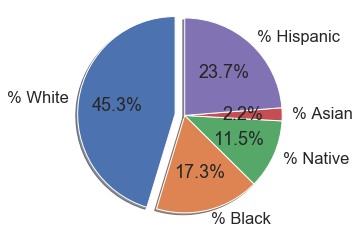

In [157]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '% White', '% Black', '% Native', '% Asian', '% Hispanic'
sizes = [63, 24, 16, 3, 33]
explode = (0.1, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Now that we know more about the demographic information in this dataset we can move on to our next area of interest!

#### 3.1D: What do our crime data look like?
[Back to Outline](#Project-Outline:-Final-Project-EDA)

Our initial EDA for this sub-dataset can be found [here](https://github.com/SteeleAlloy/final_capstone/blob/master/dpd_data_eda.ipynb) towards the bottom of the notebook!

## 4. Relationships Between Features & Visualizations
[Back to Outline](#Project-Outline:-Final-Project-EDA)

Since we are using Tableau to make a dashboard with this data we will use Tableau's fancy visualization to look at relationships between multiple features!

Want to know what I did with this data? Check out the project page [here](https://steelealloy.github.io/final_capstone/)